# DATA EXPLORATION STEPS
- Initial imports
- Visualisations of feature distributions
- Visualisations of odds ratios (measure of association between an event and the target variable)
- Stats scores calculations
- Key takeaways

## <u>Initial imports</u>

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
import numpy as np 
import json
import warnings
warnings.filterwarnings("ignore")


# import data
df_base = pd.read_csv('data/Base.csv') 

# import feature data types
with open('python_scripts/data_types.json') as f:
    data_types = json.load(f) 

# encoding source {'INTERNET', 'TELEAPP'} into source_is_internet_not_teleapp
df_base['source_is_internet_not_teleapp'] = (df_base['source'] == 'INTERNET').astype(int)
df_base.drop('source', axis=1, inplace=True)


# recording which variables have missing values recorded as -1
missing_values = ['prev_address_months_count',
                  'current_address_months_count',
                  'bank_months_count',
                  'session_length_in_minutes',
                  'device_distinct_emails_8w']

In [2]:
from python_scripts import EDA

FeatureSignificance = EDA.FeatureSignificance
FeatureVisualisation = EDA.FeatureVisualisation
OddsRatios = EDA.OddsRatios

## <u>Data Visualisation</u>

In [3]:
fv = FeatureVisualisation(df_base, target='fraud_bool')
fv.info()

ordinal                                            [Bar charts]
numerical                 [Density plots, Boxplots, Bar charts]
nominal_multi_category         [Bar charts, Stacked bar charts]
nominal_binary                                     [Bar charts]
missing value analysis                             [Bar charts]
dtype: object


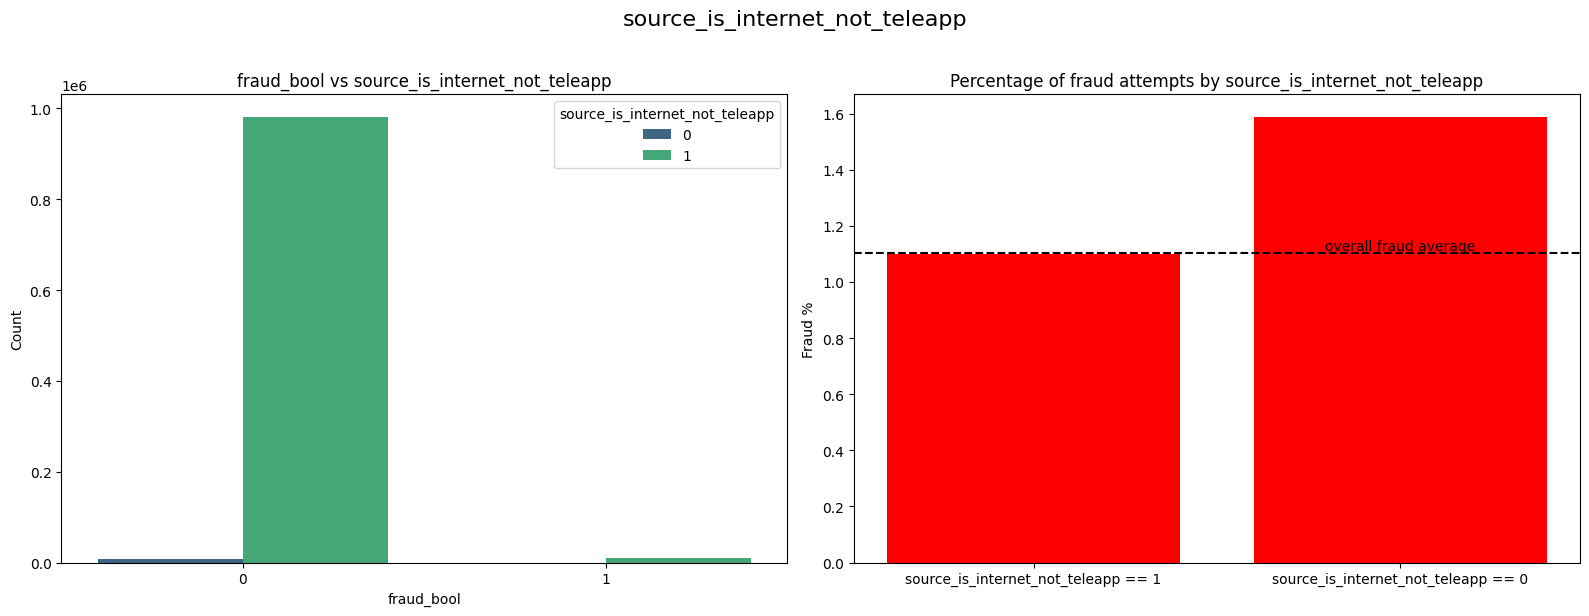

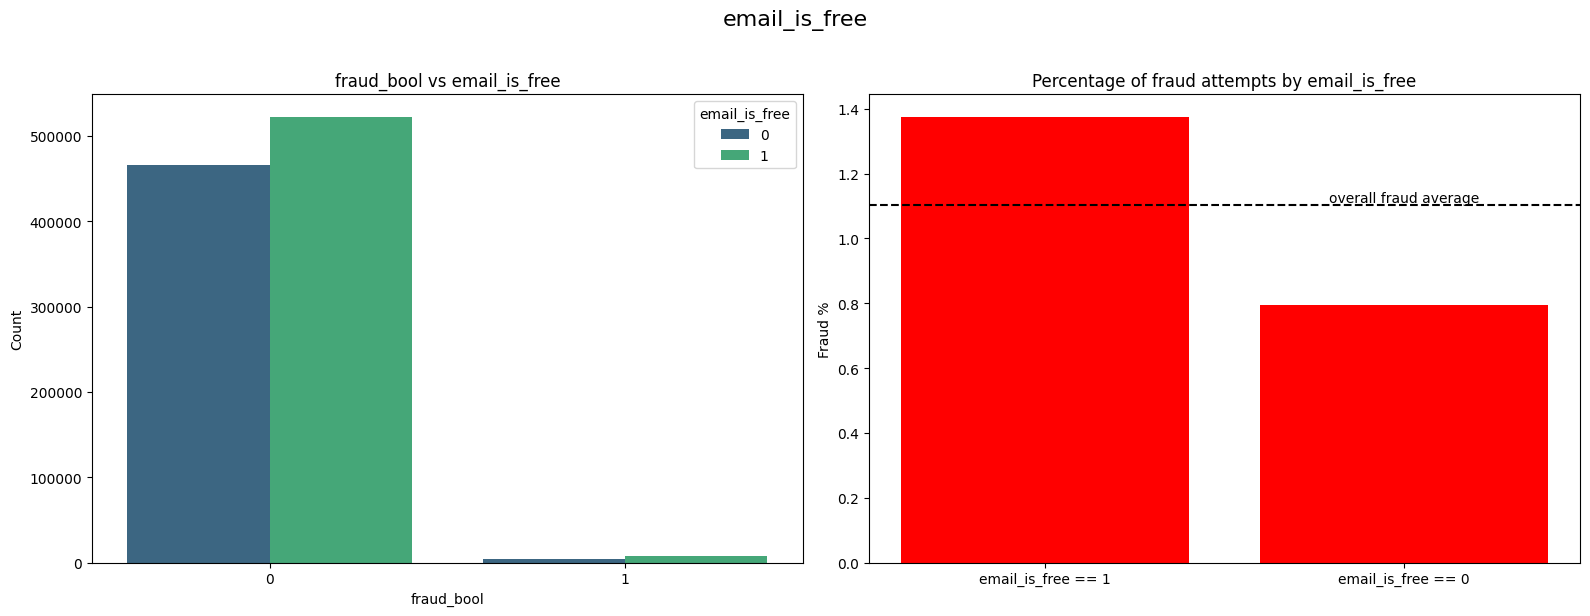

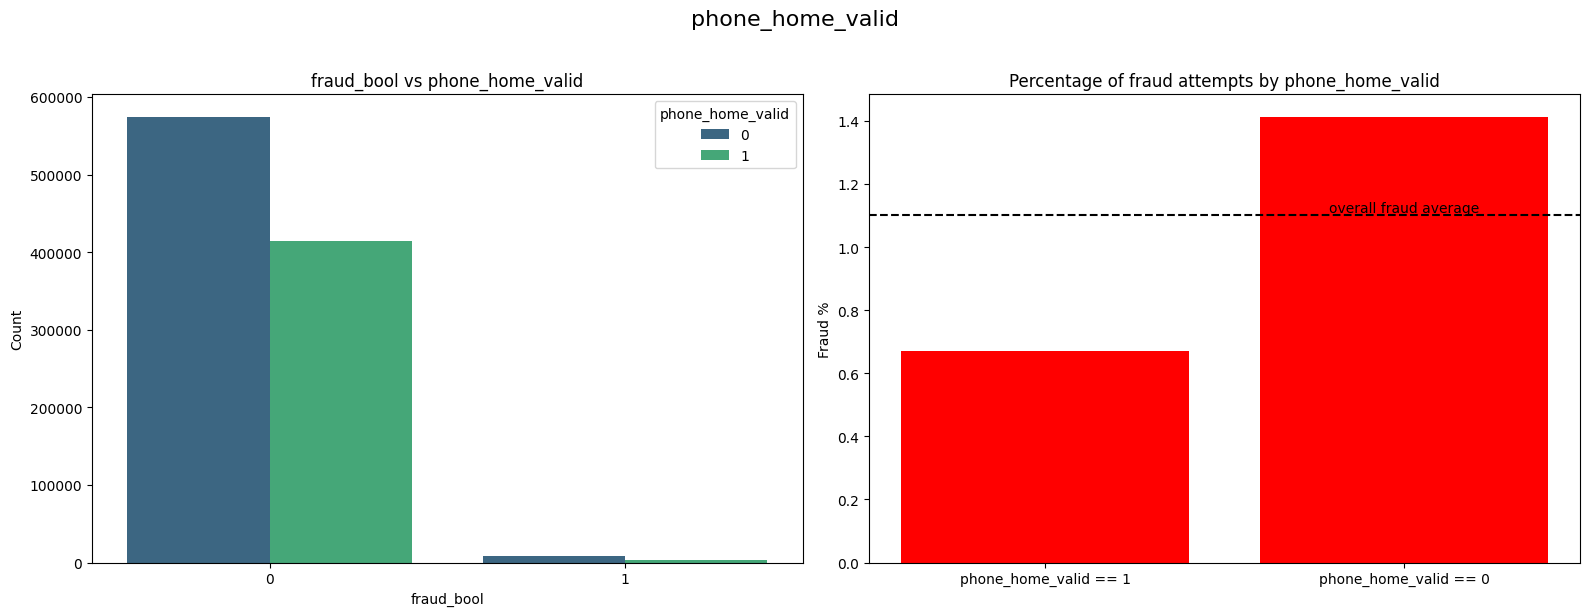

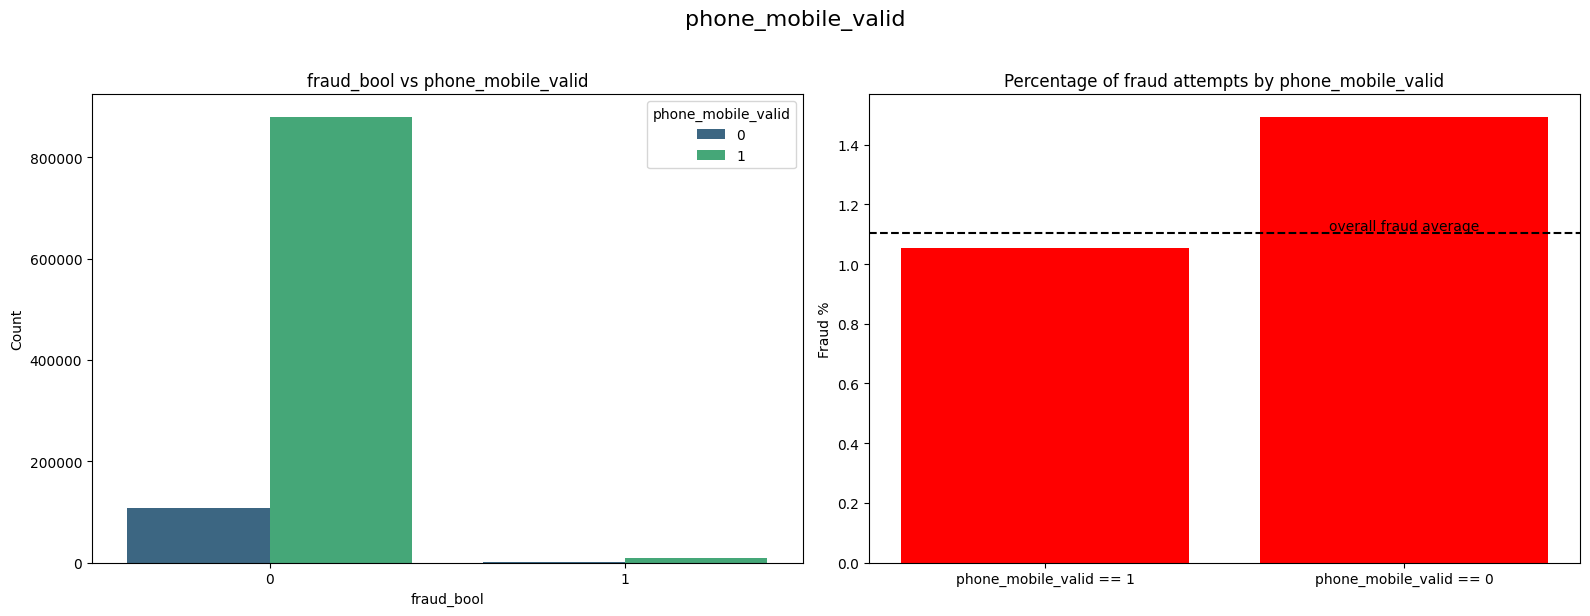

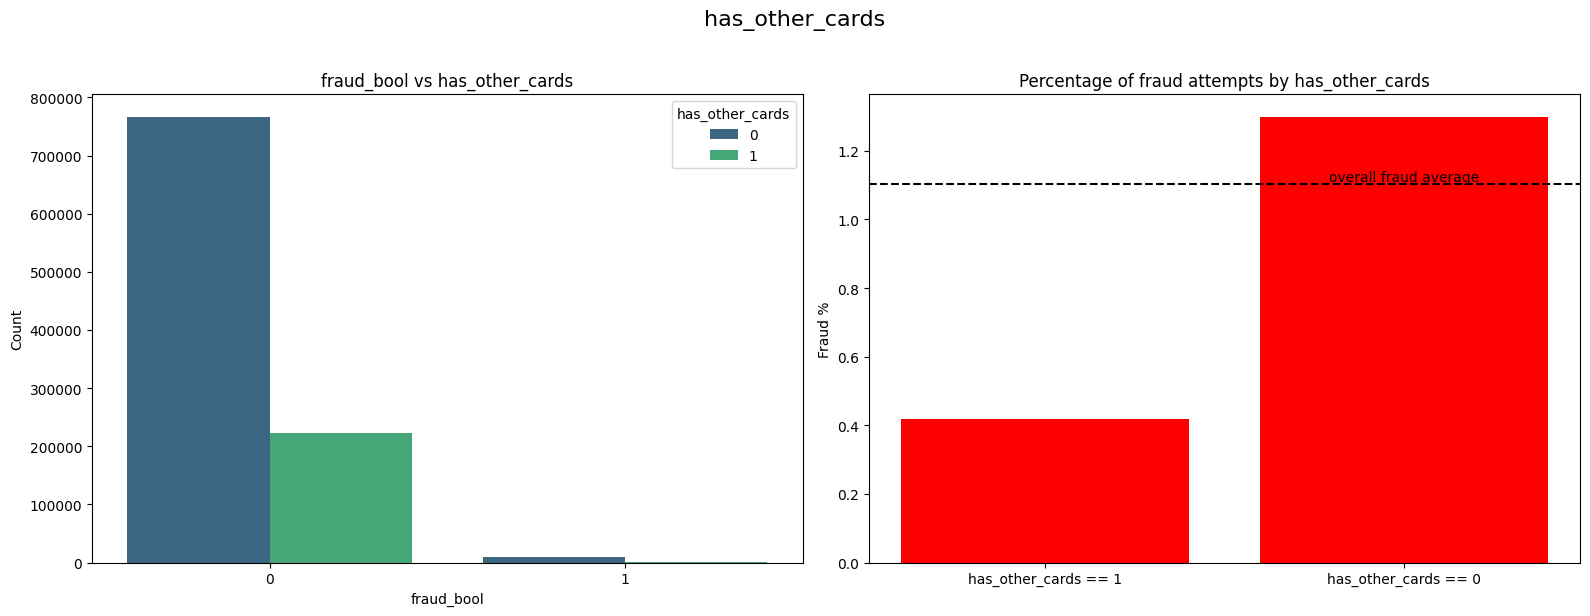

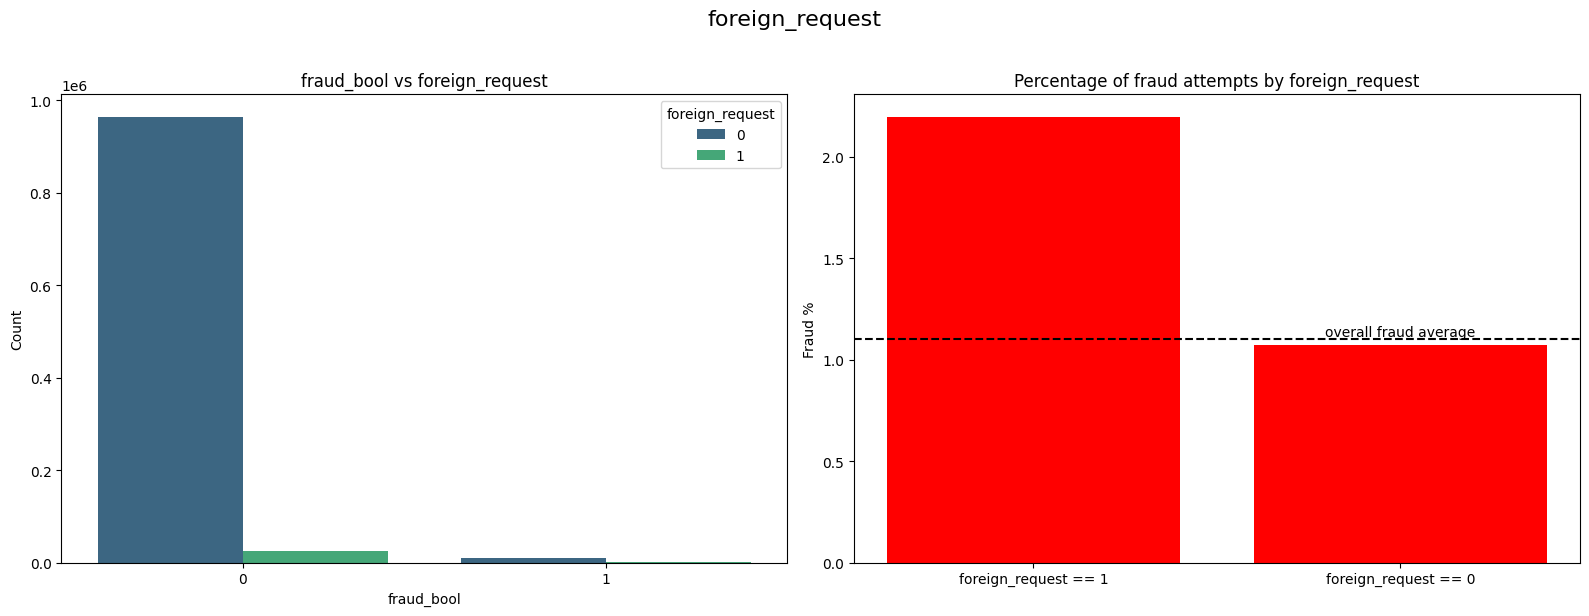

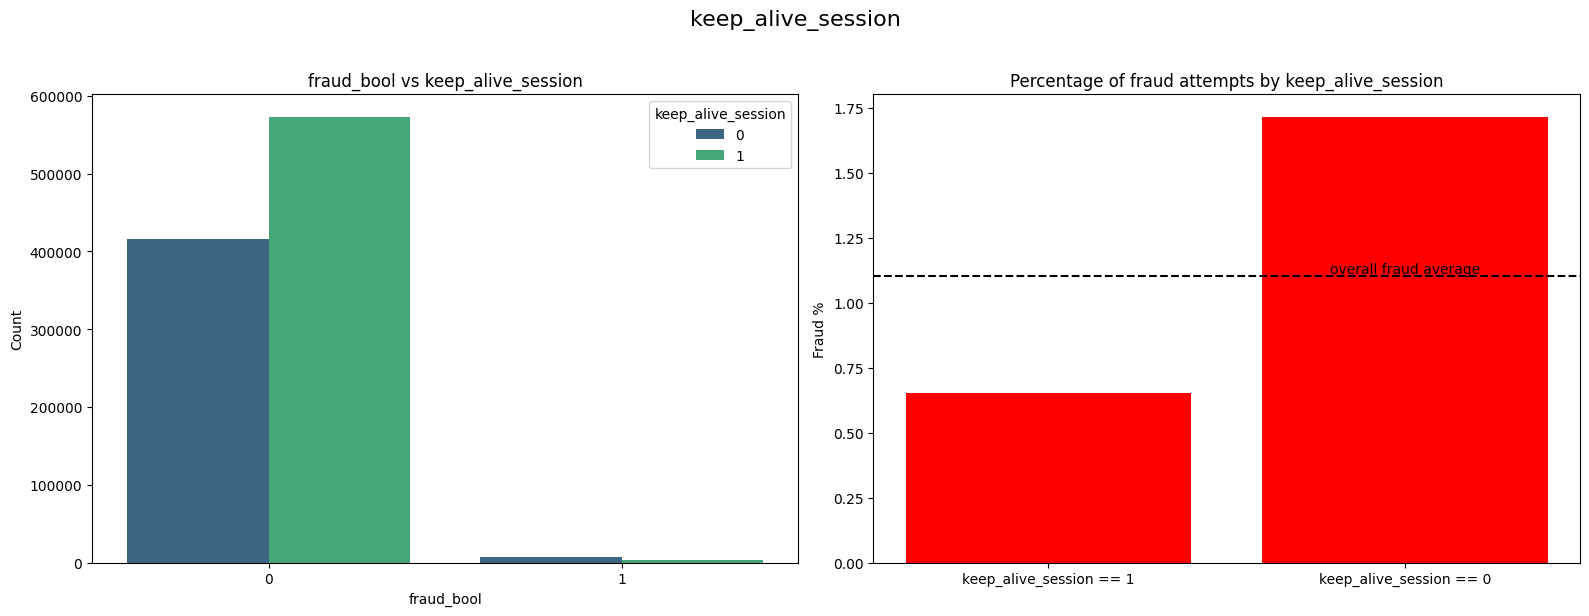

In [4]:
fv.nominal_binary(data_types['nominal_binary'])

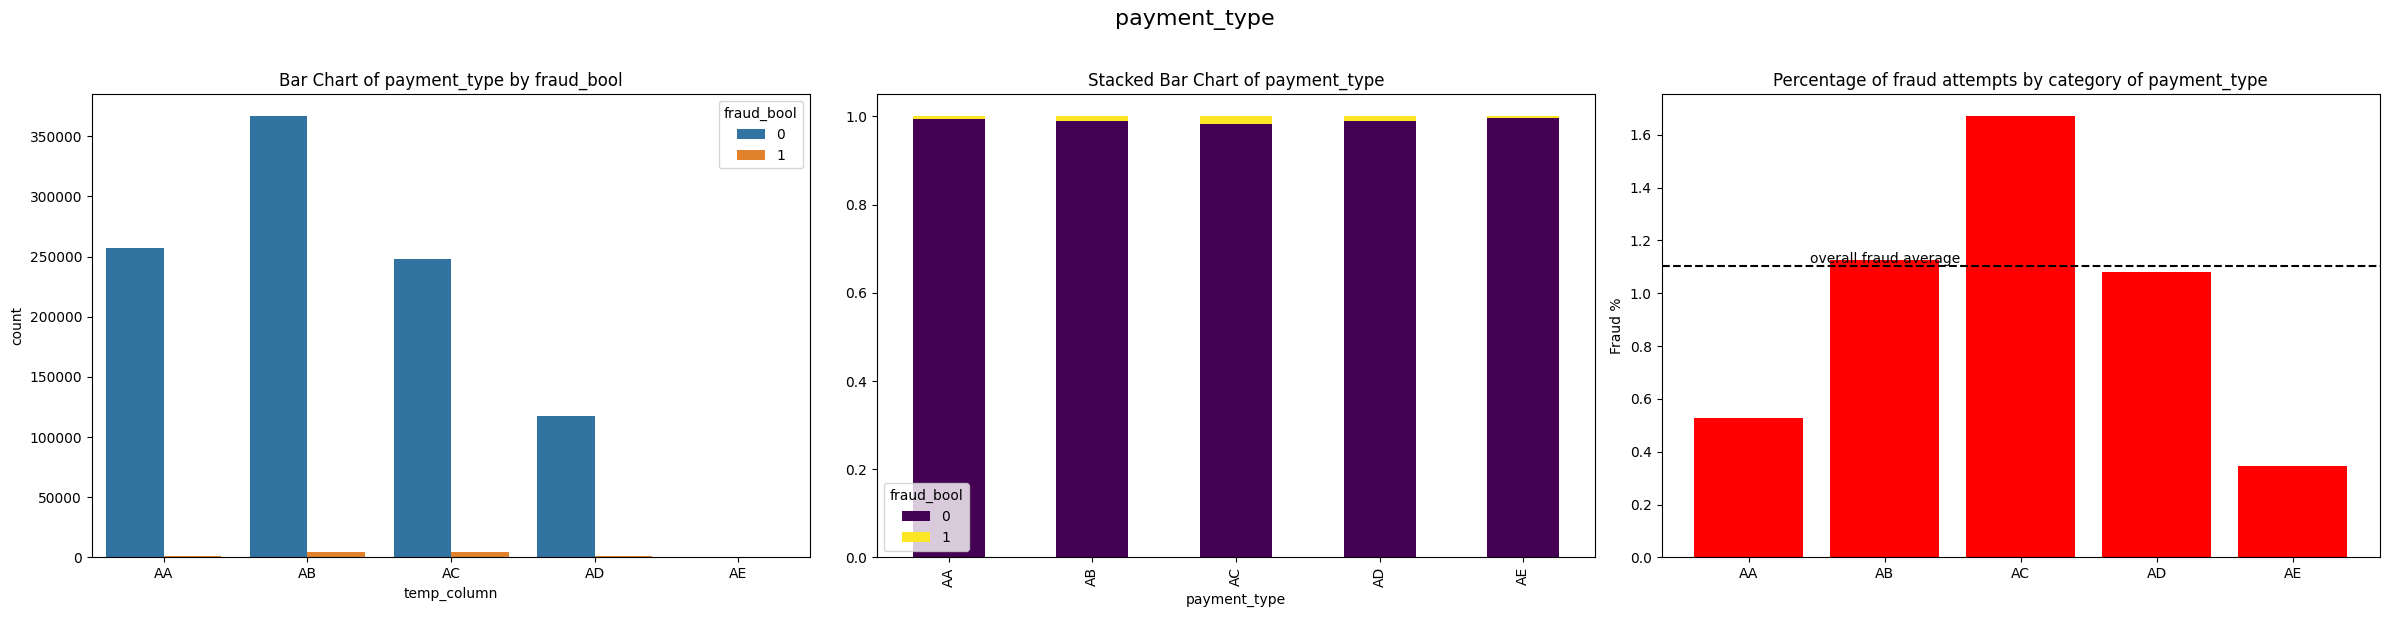

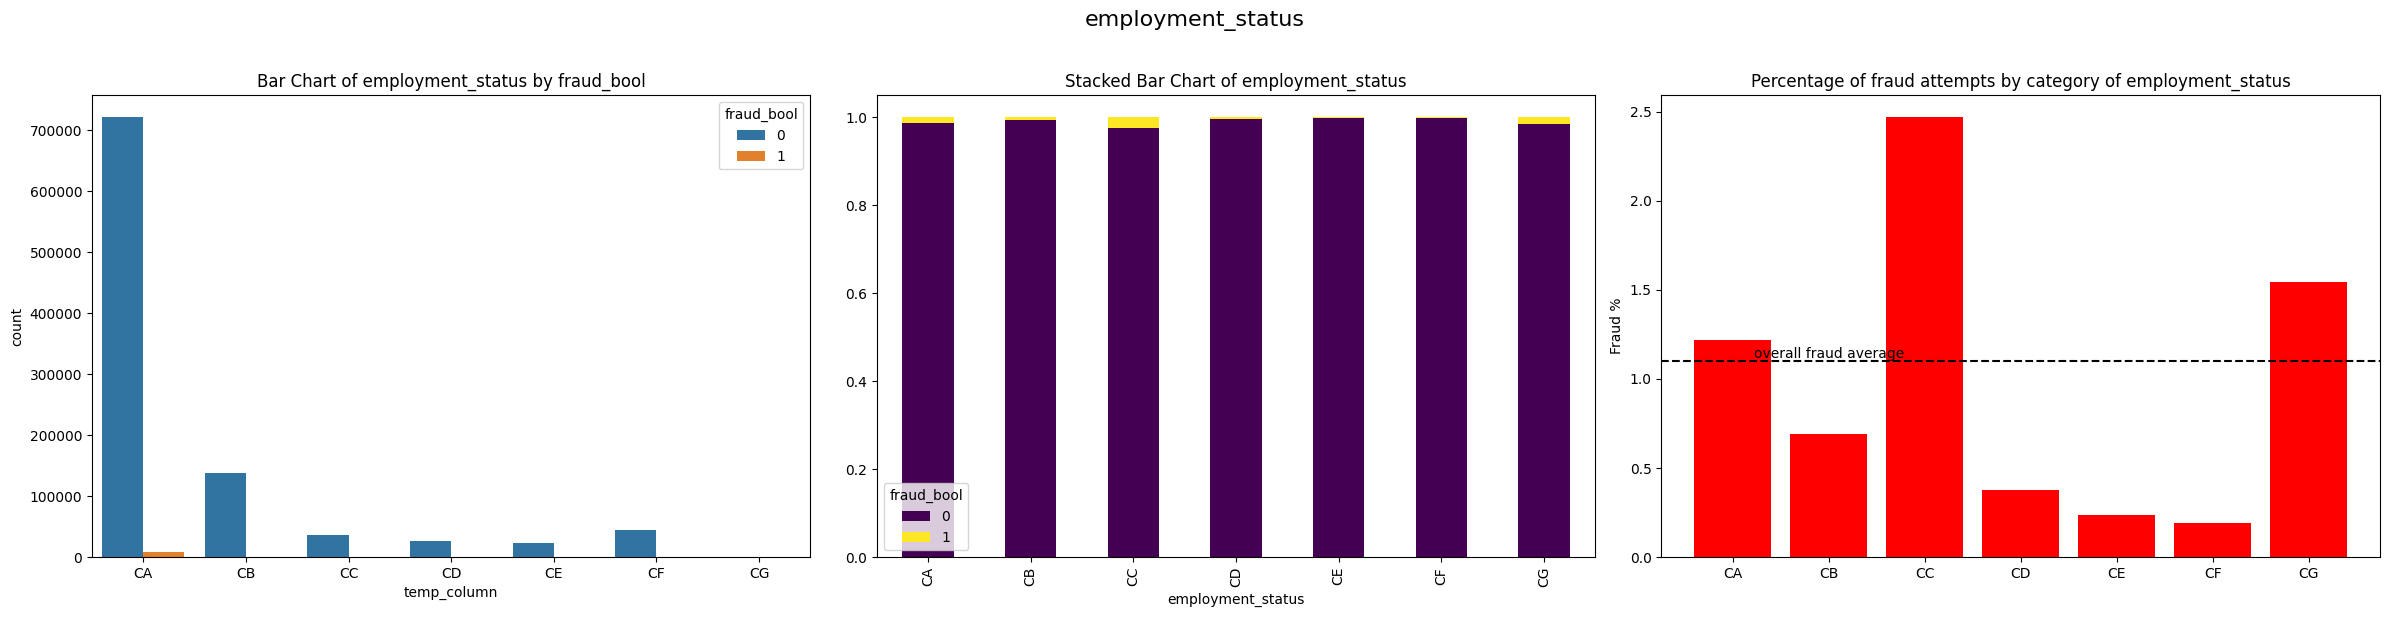

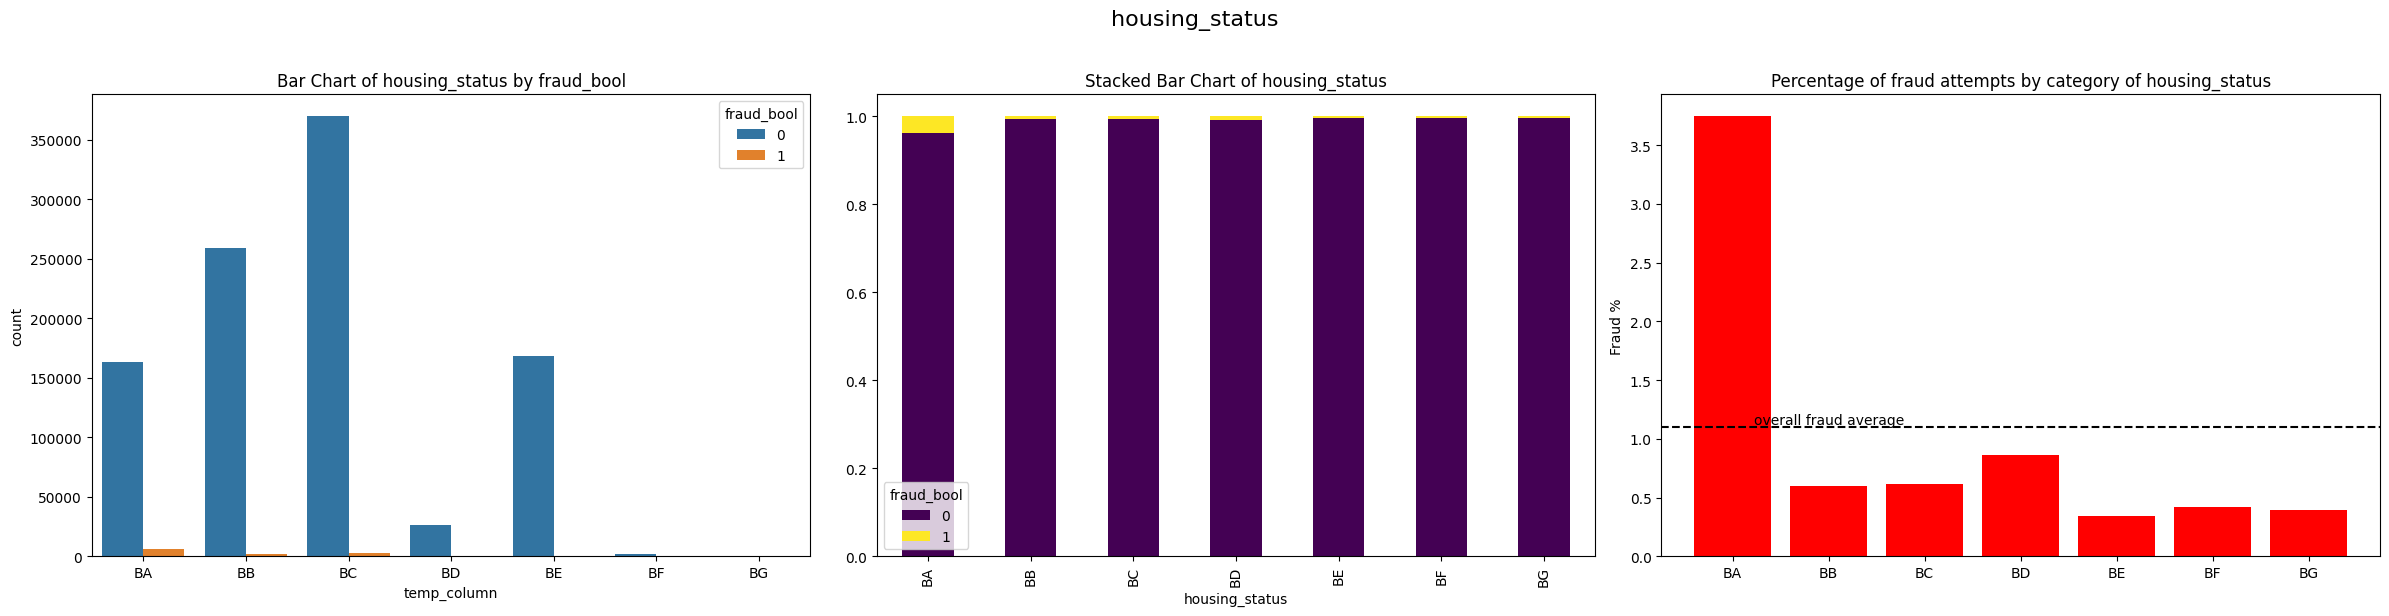

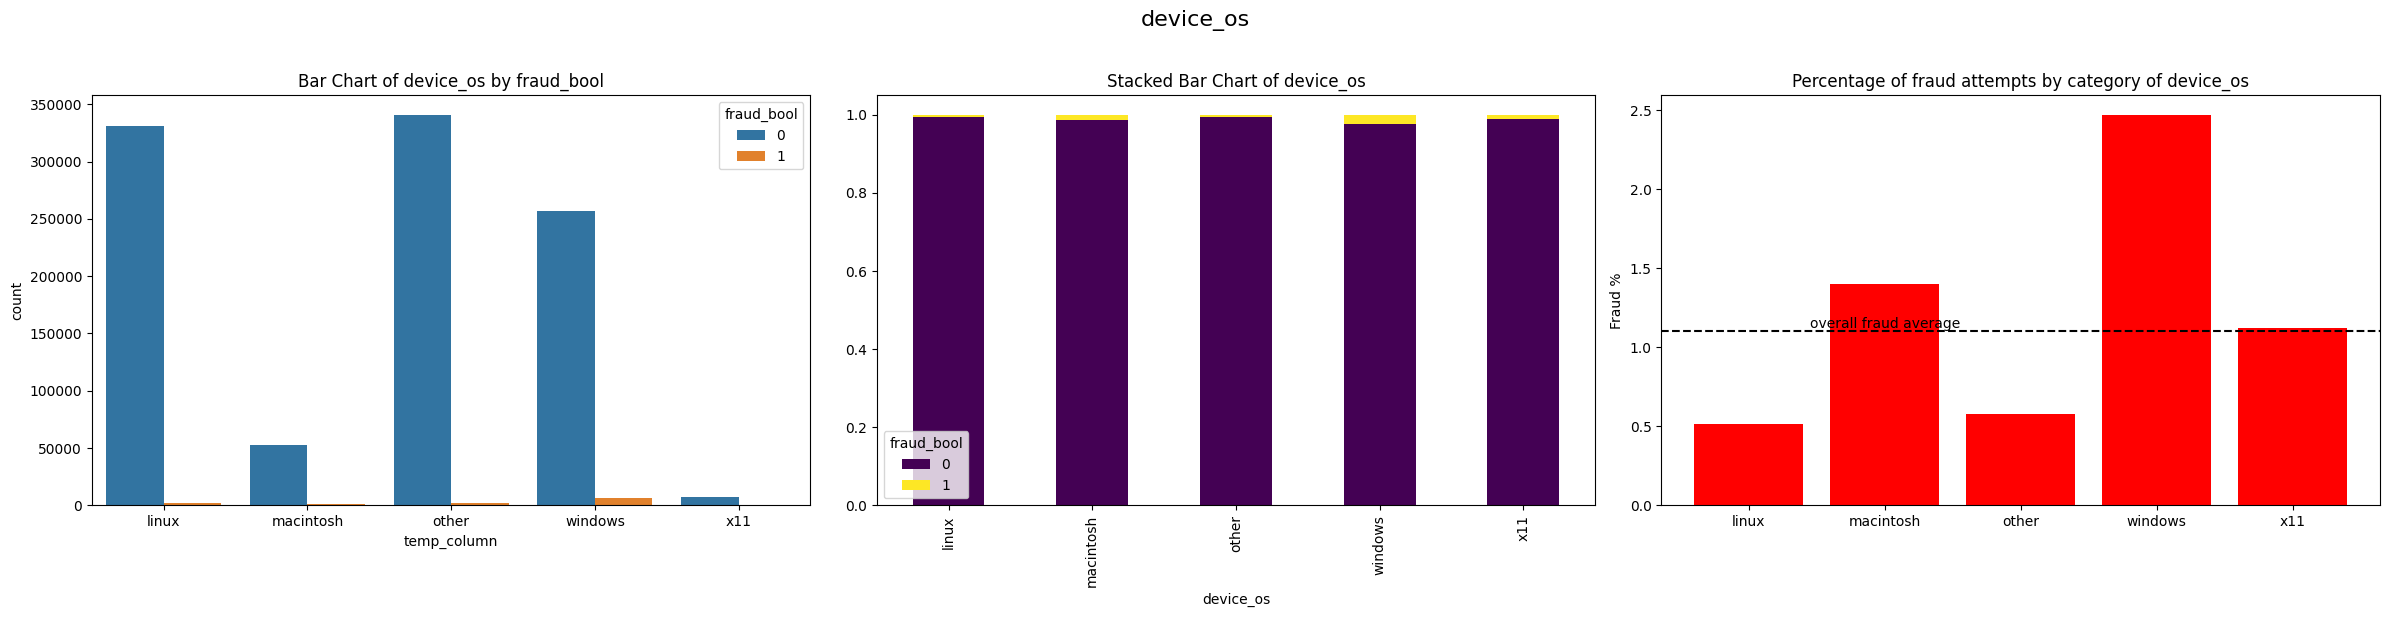

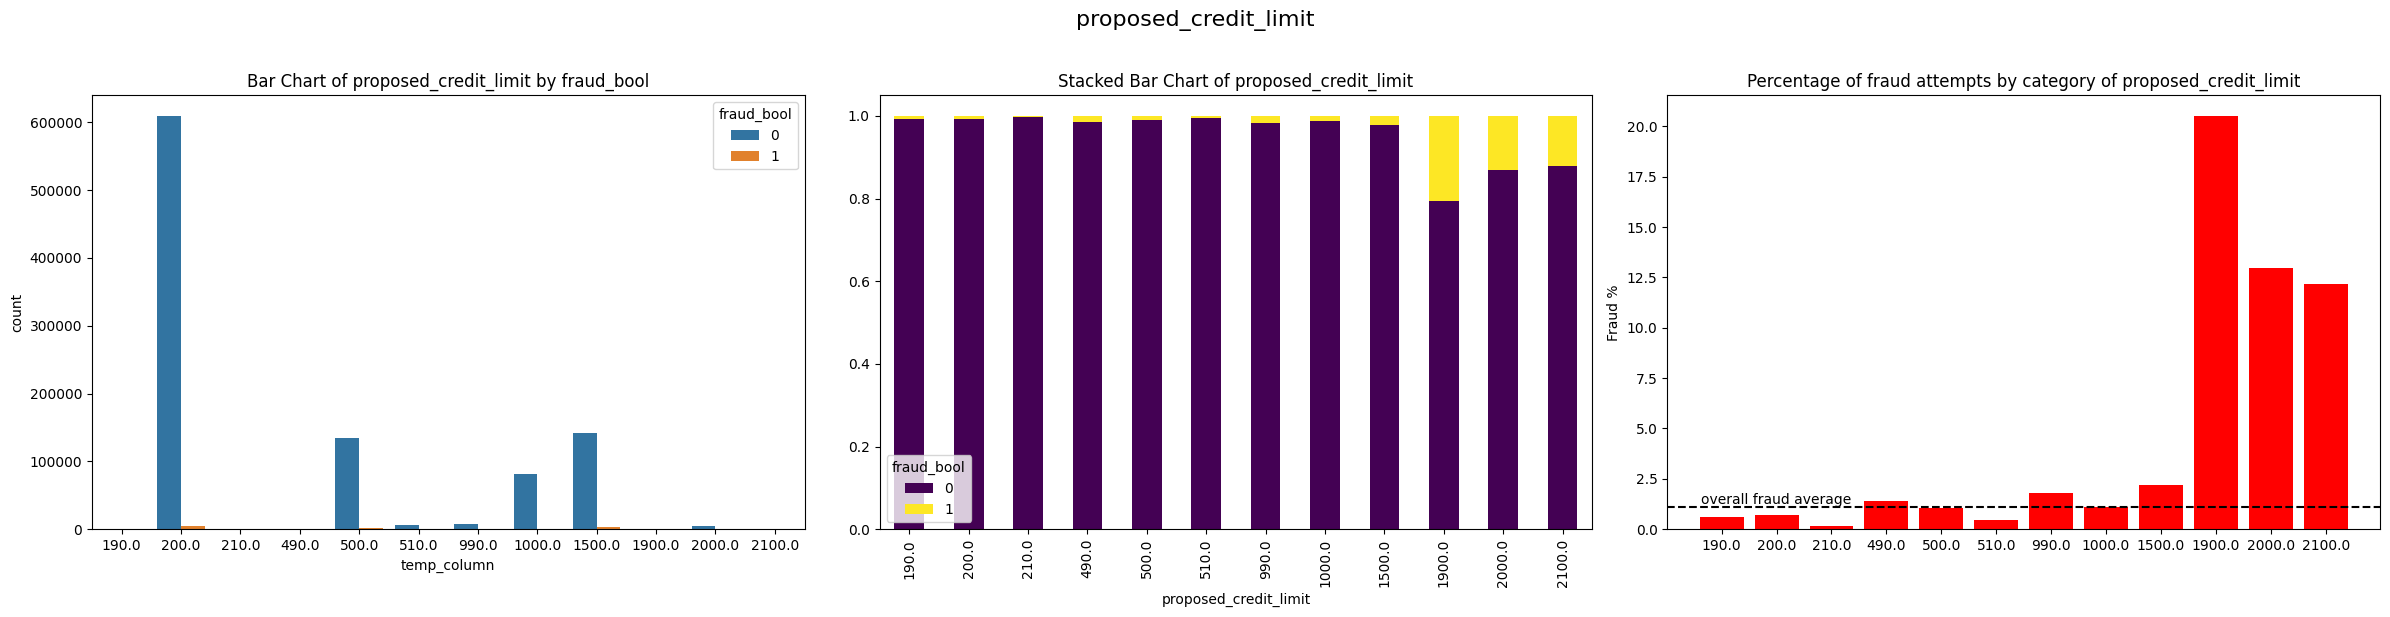

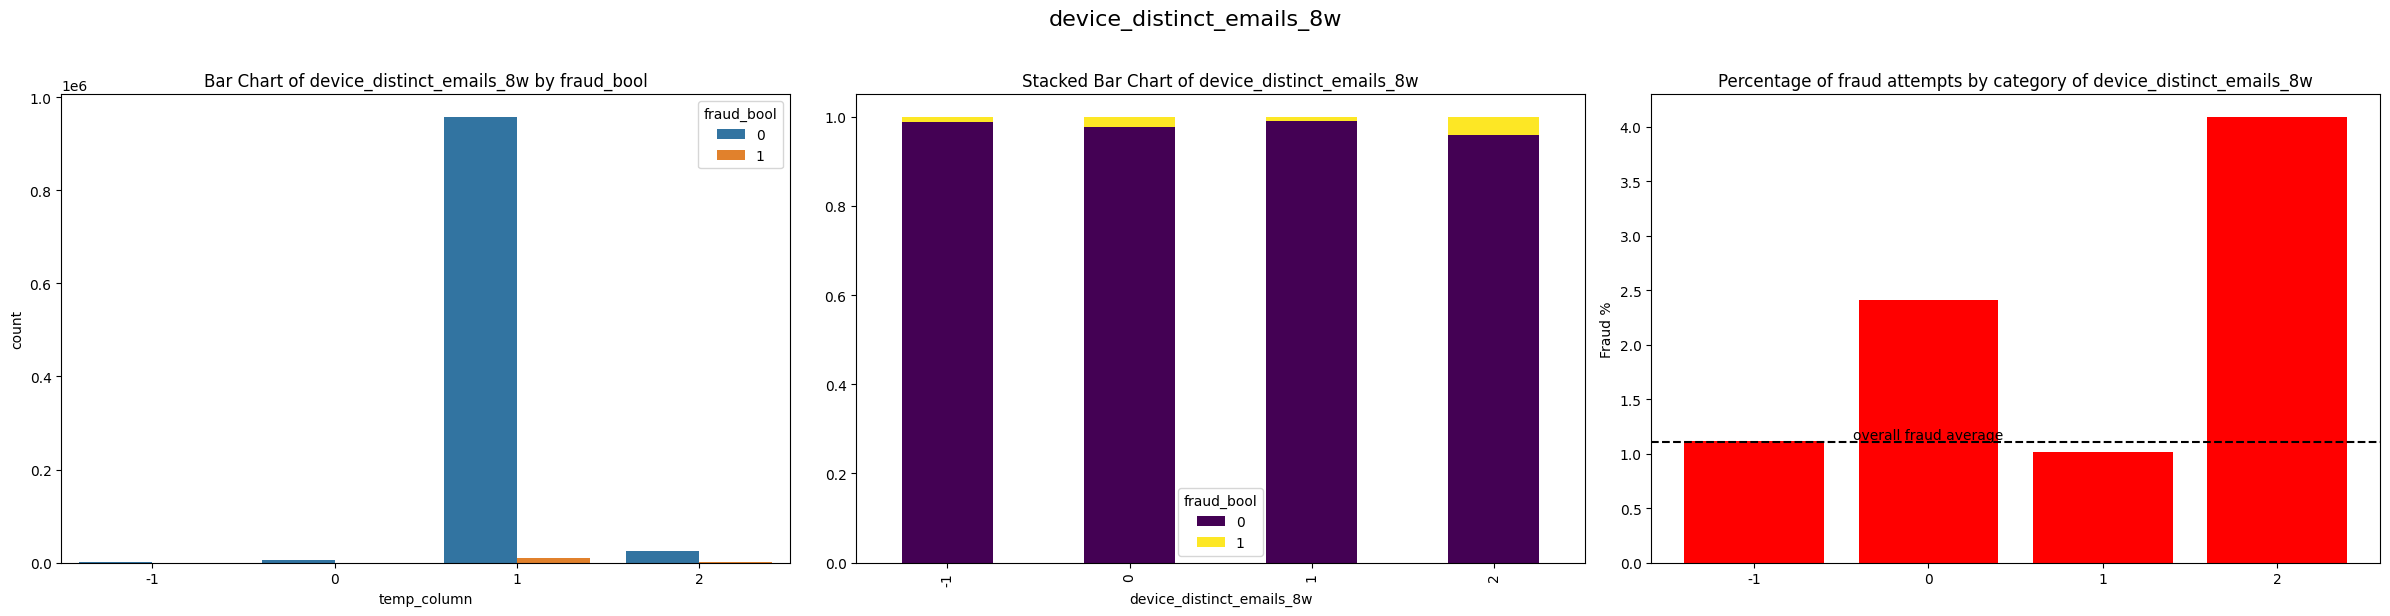

In [5]:
fv.nominal_multi_category(data_types['nominal_multi_category'])

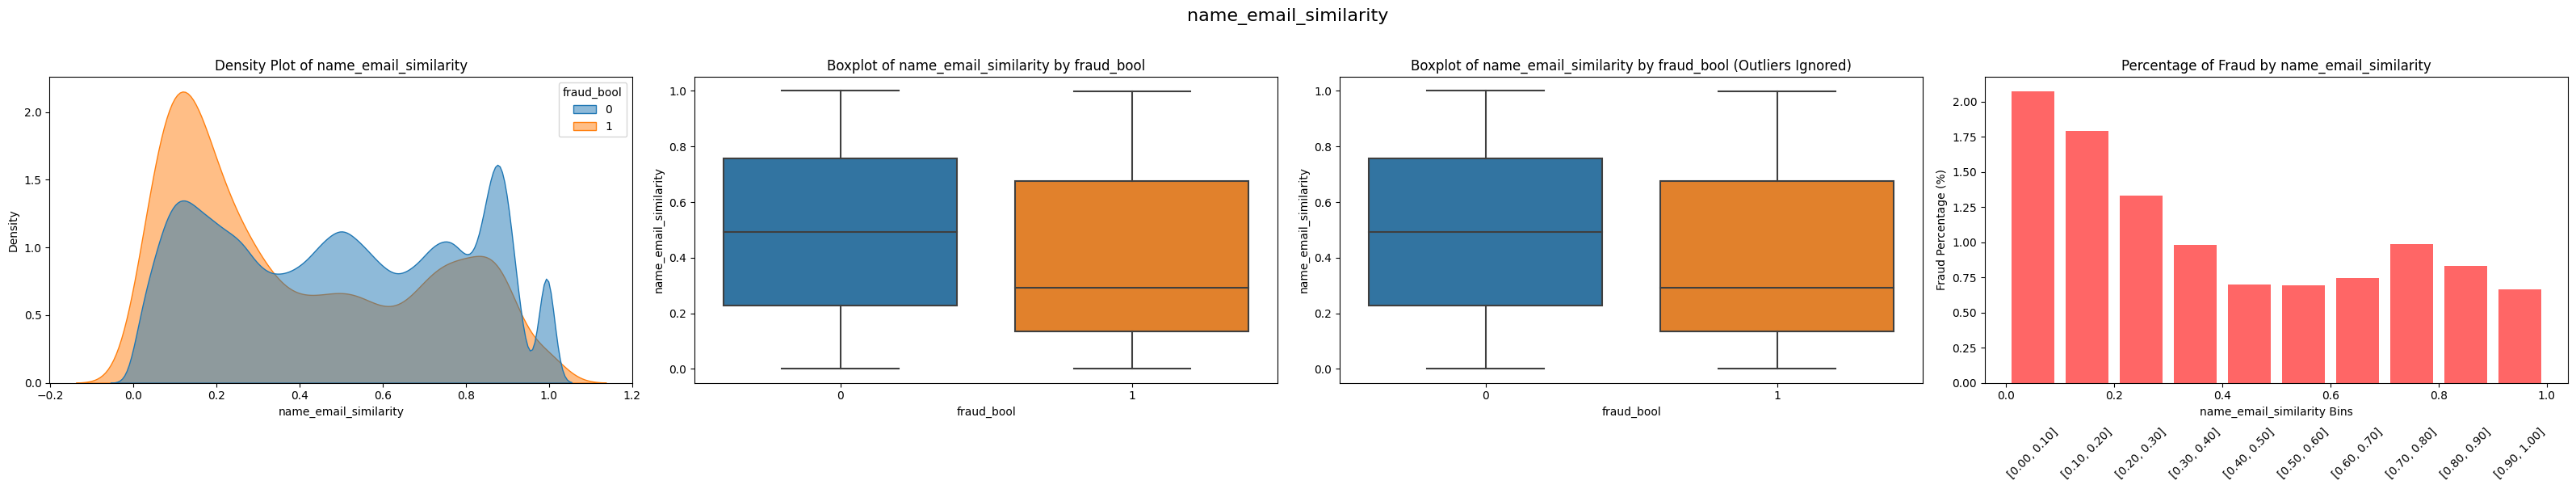

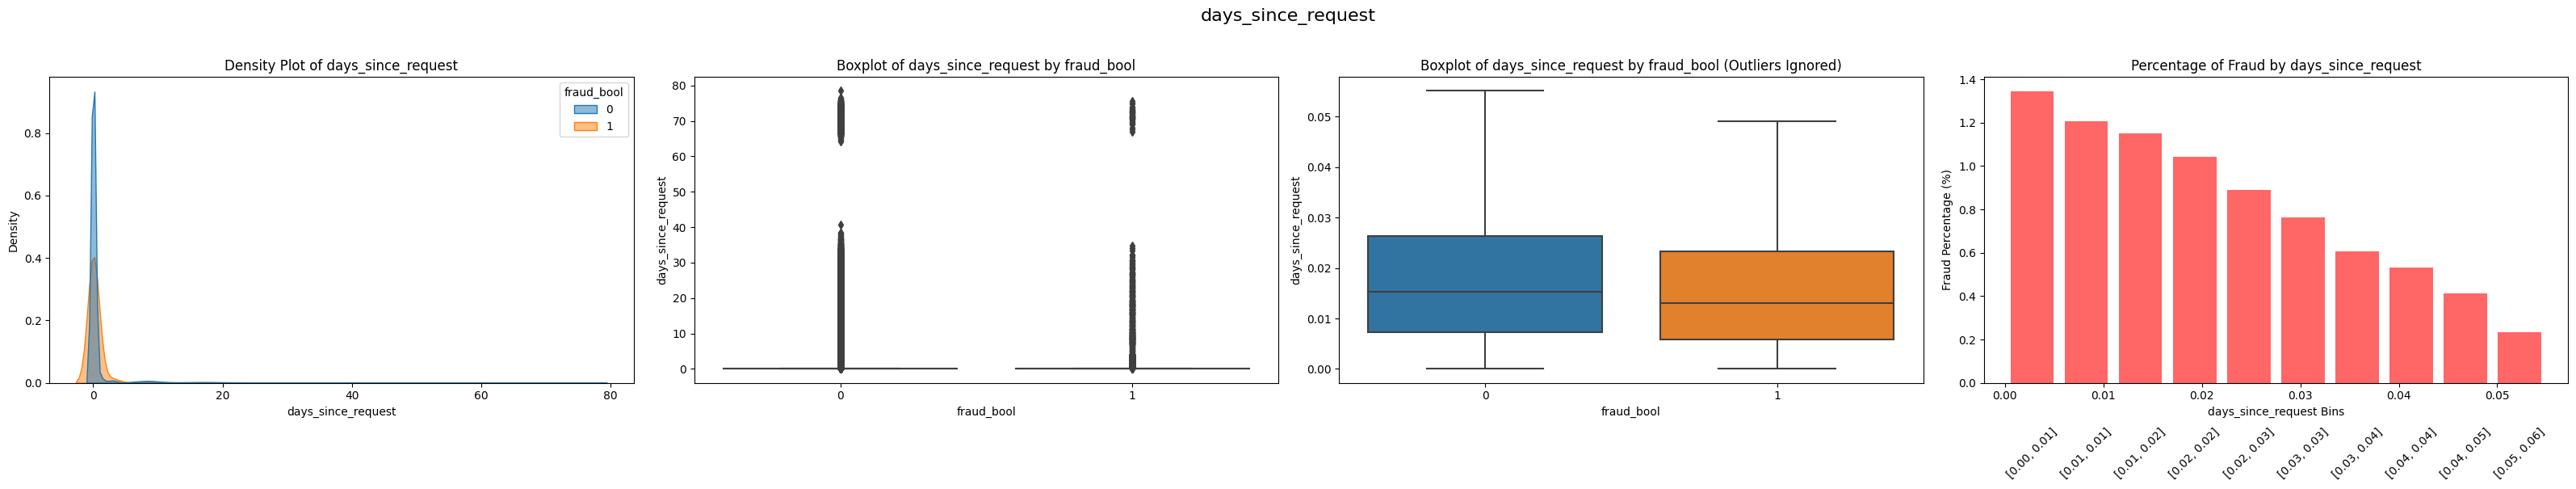

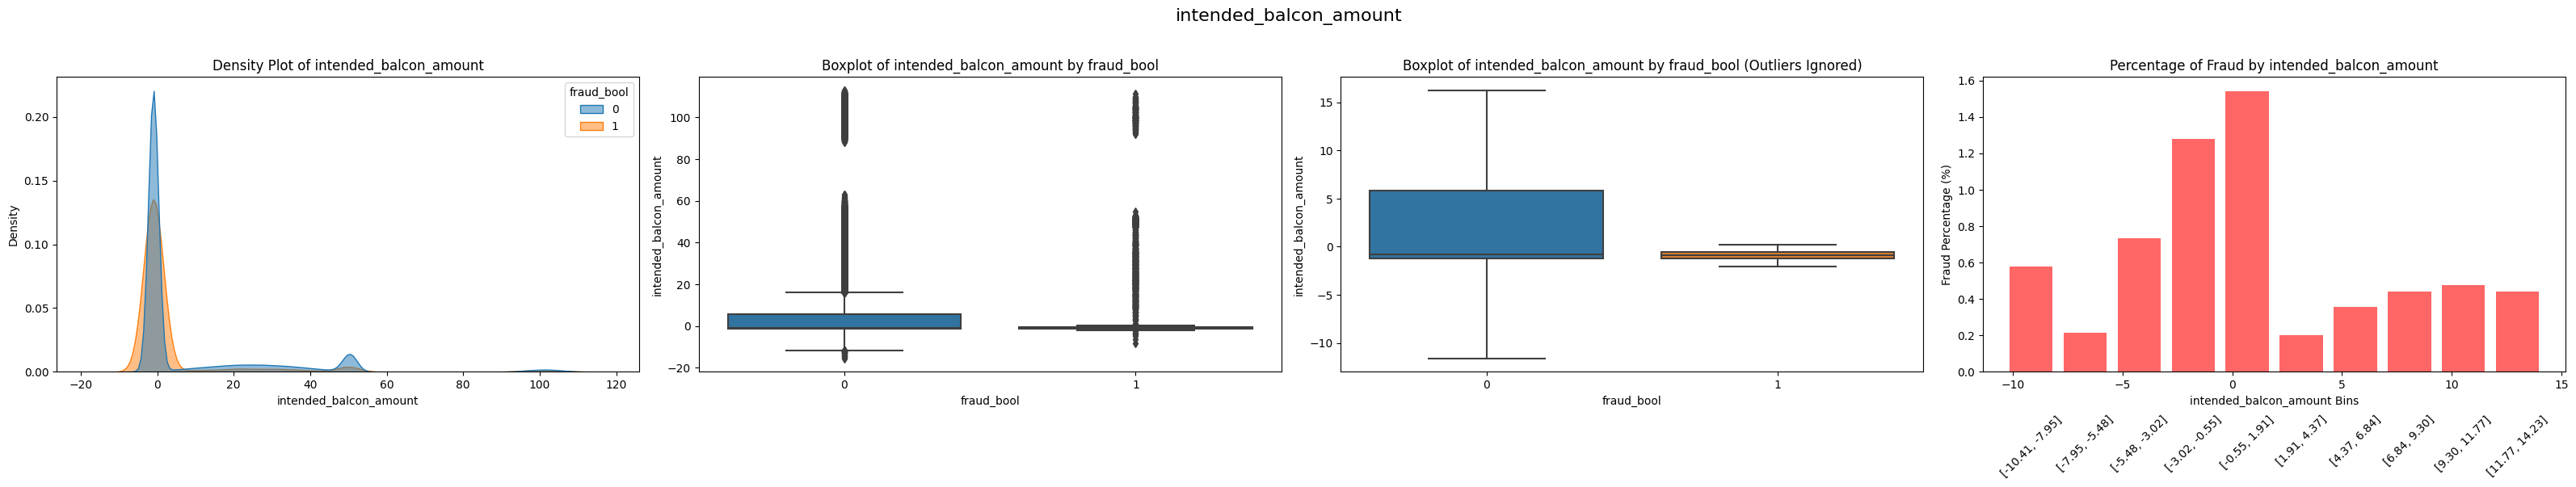

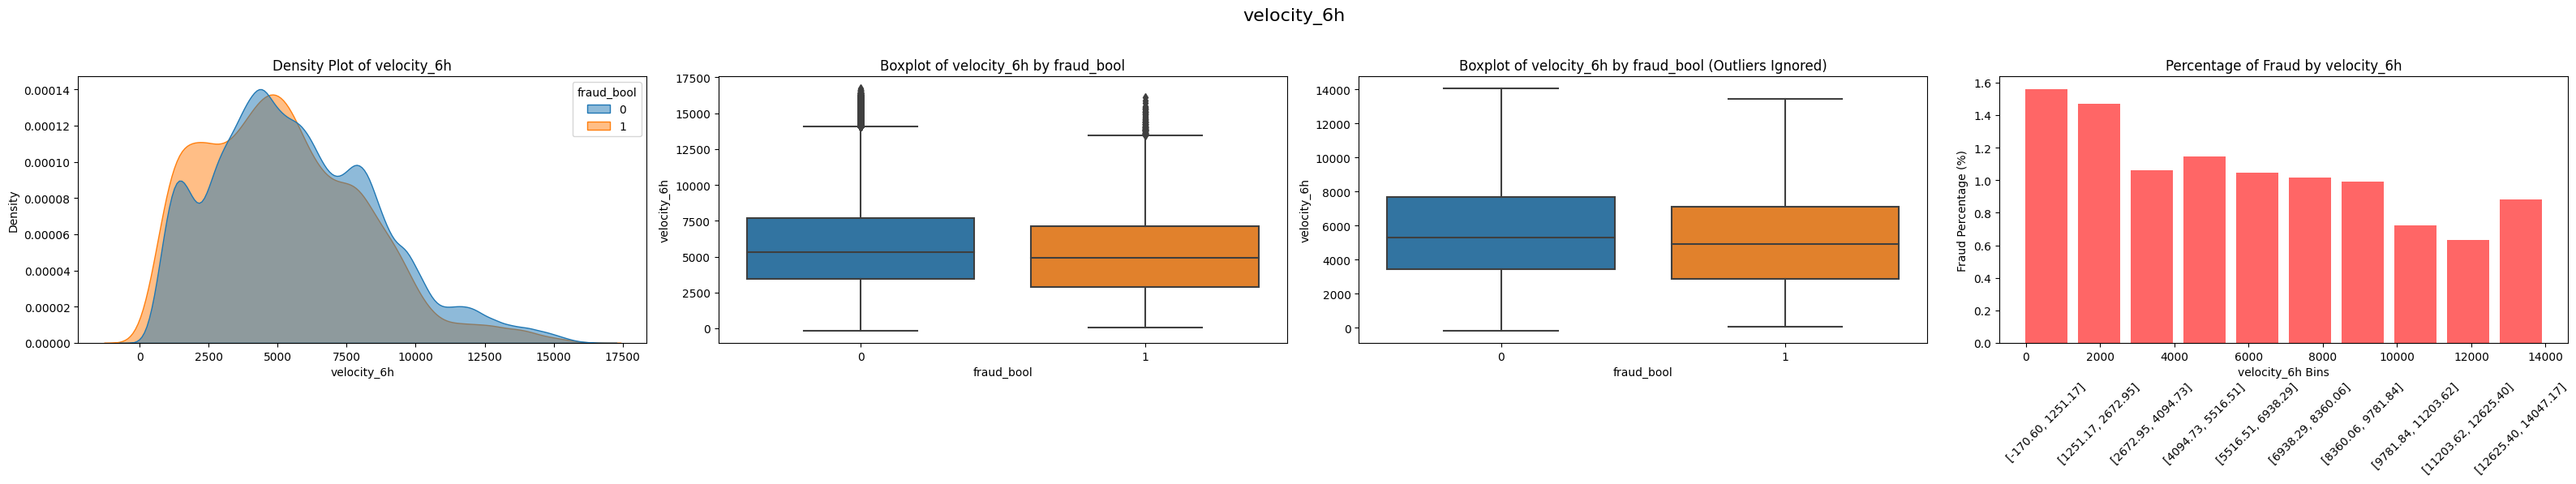

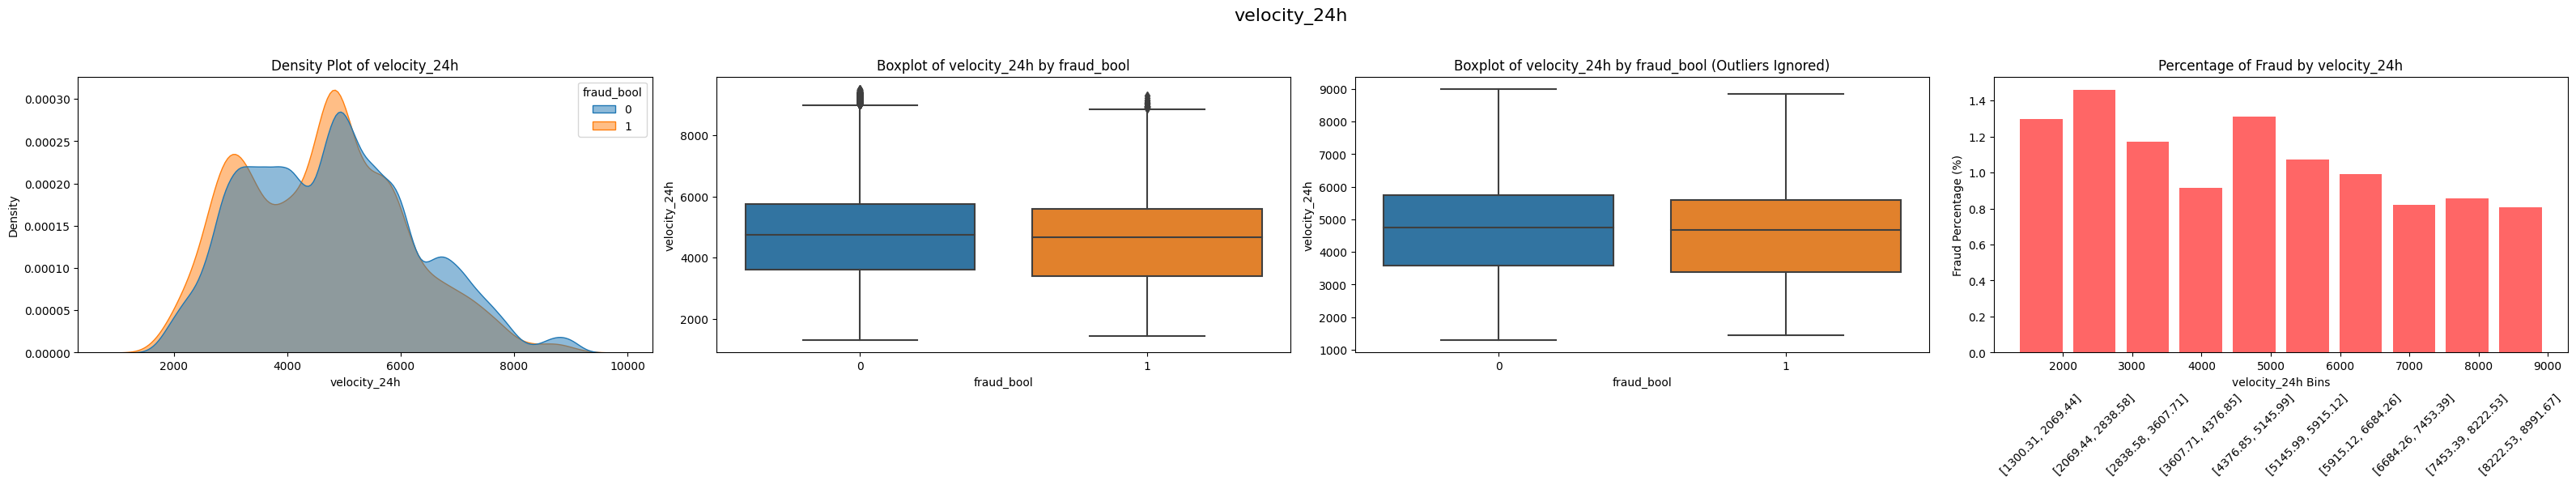

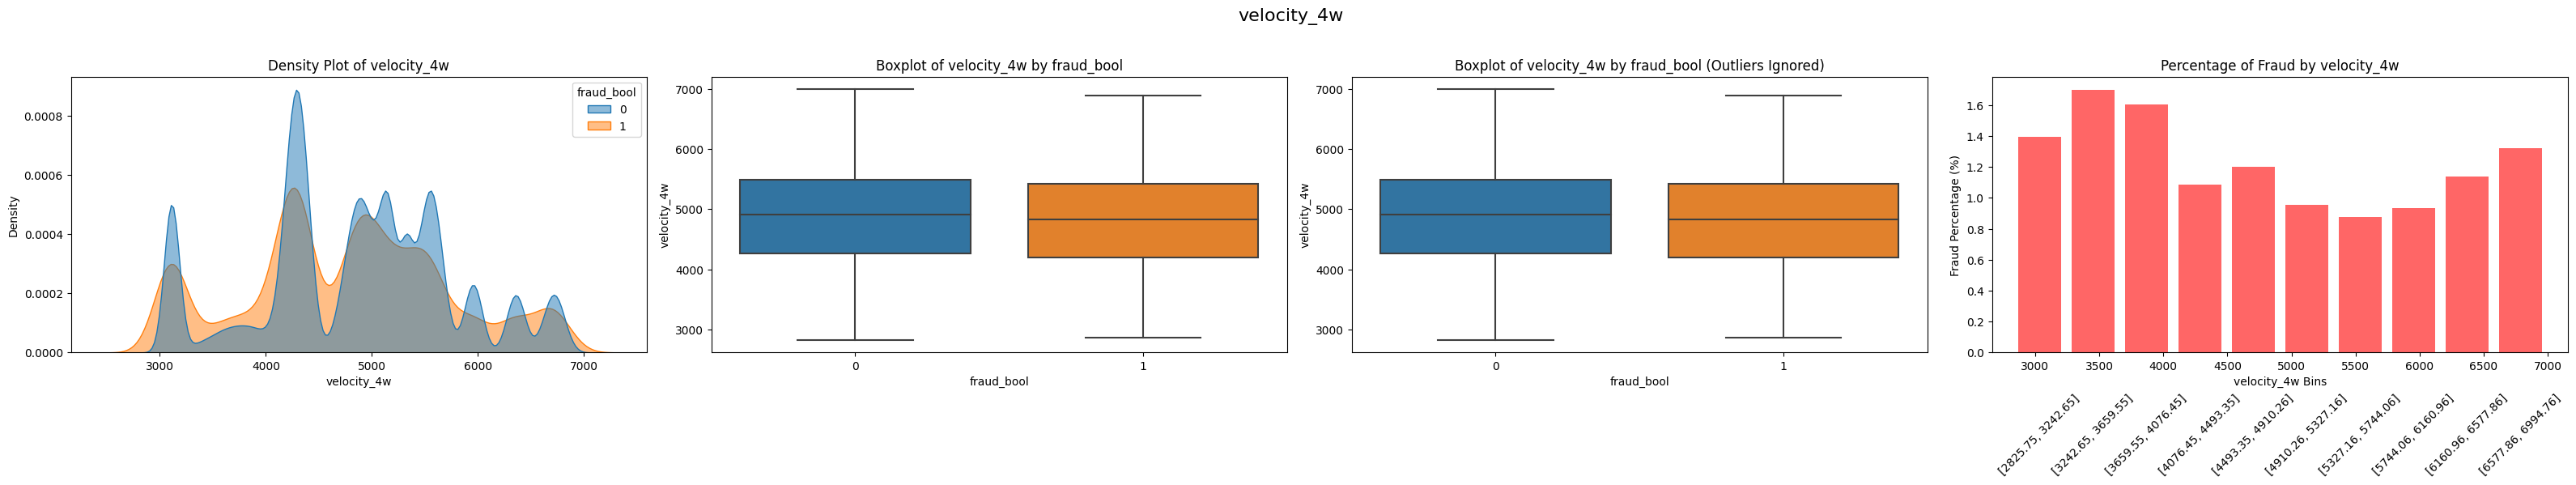

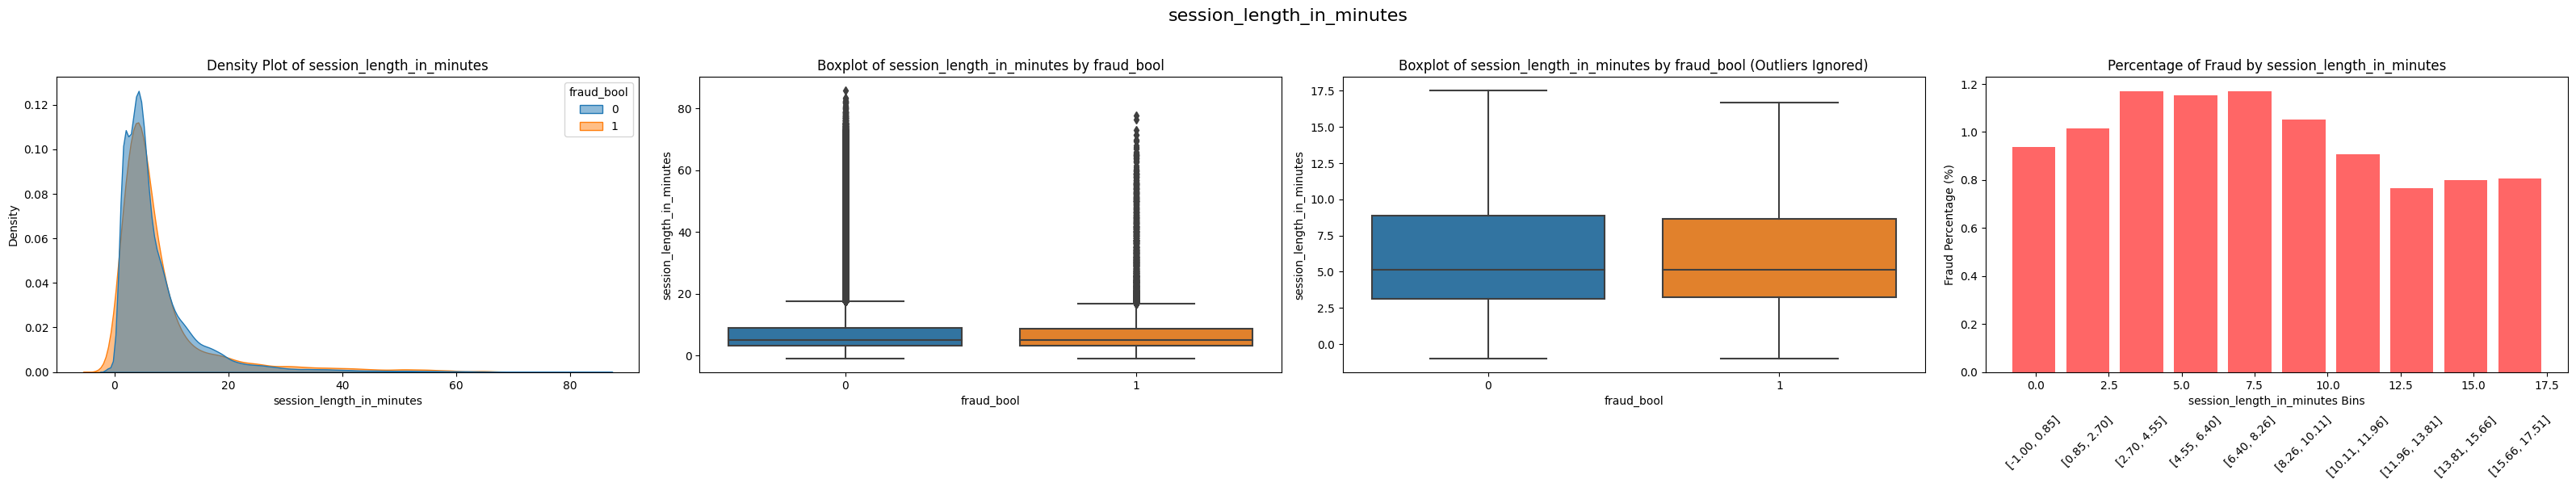

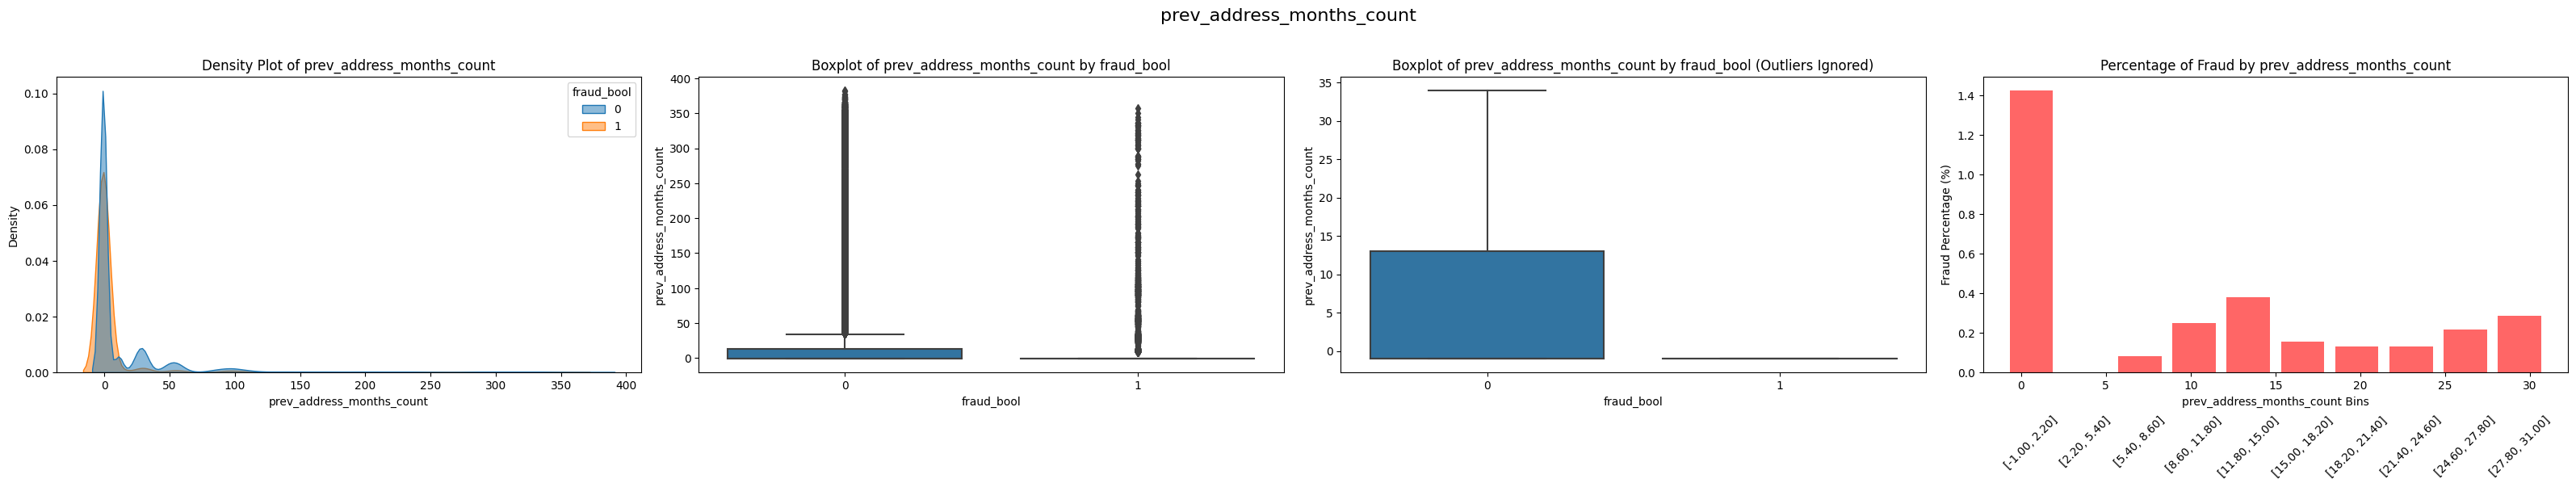

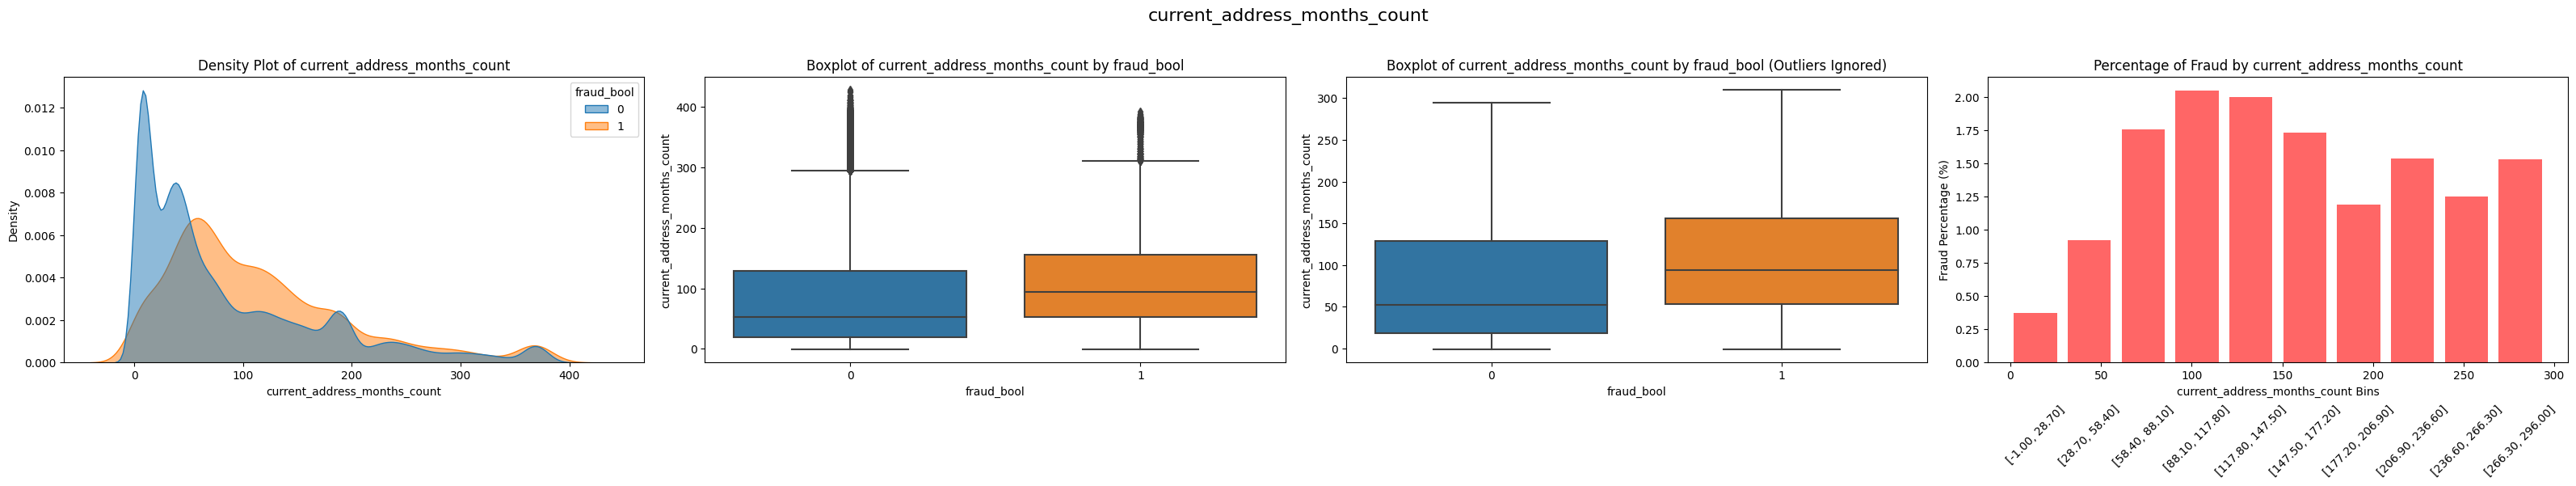

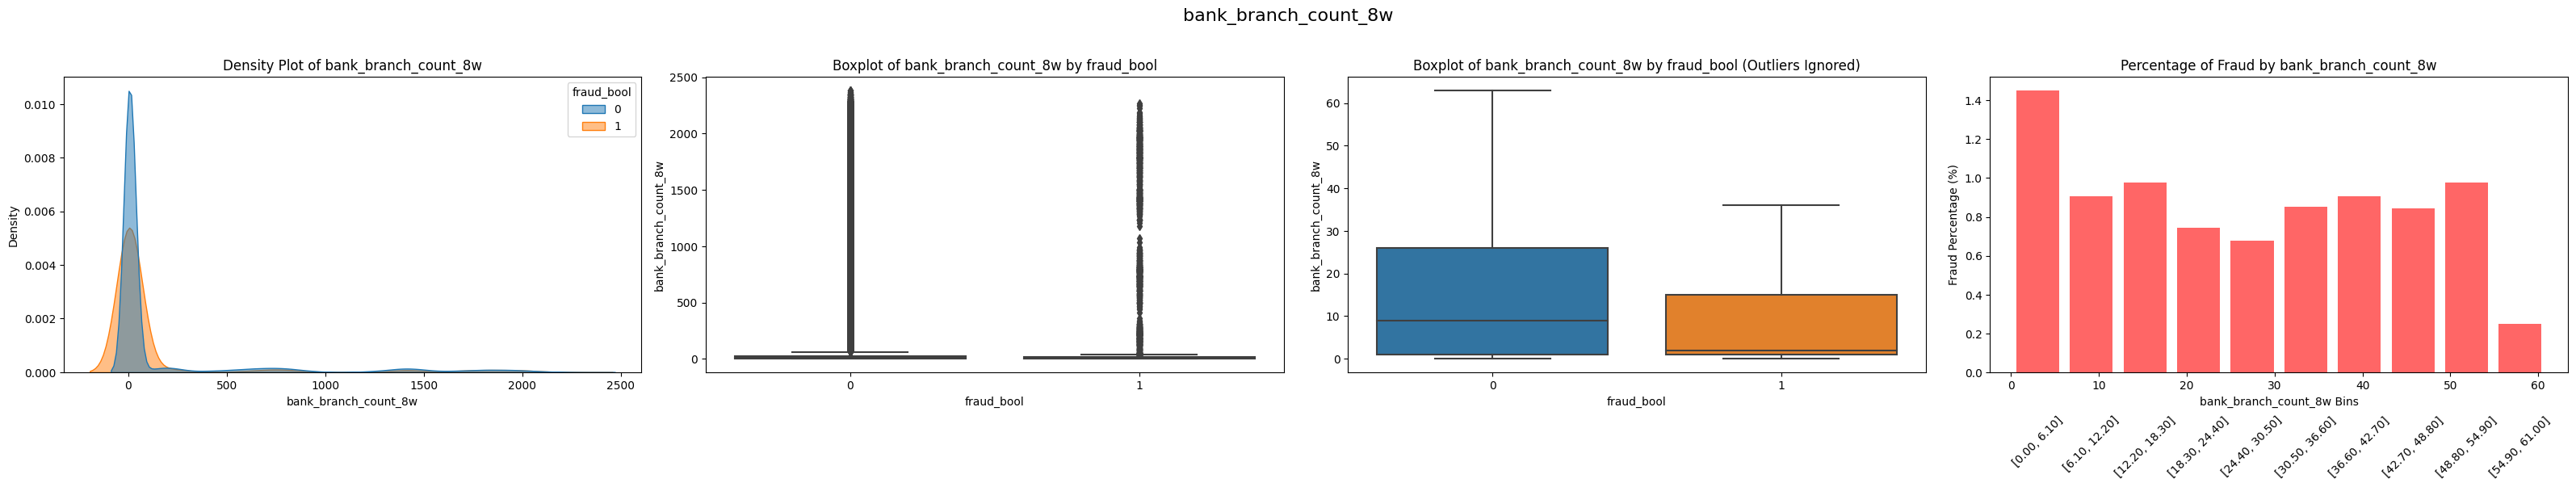

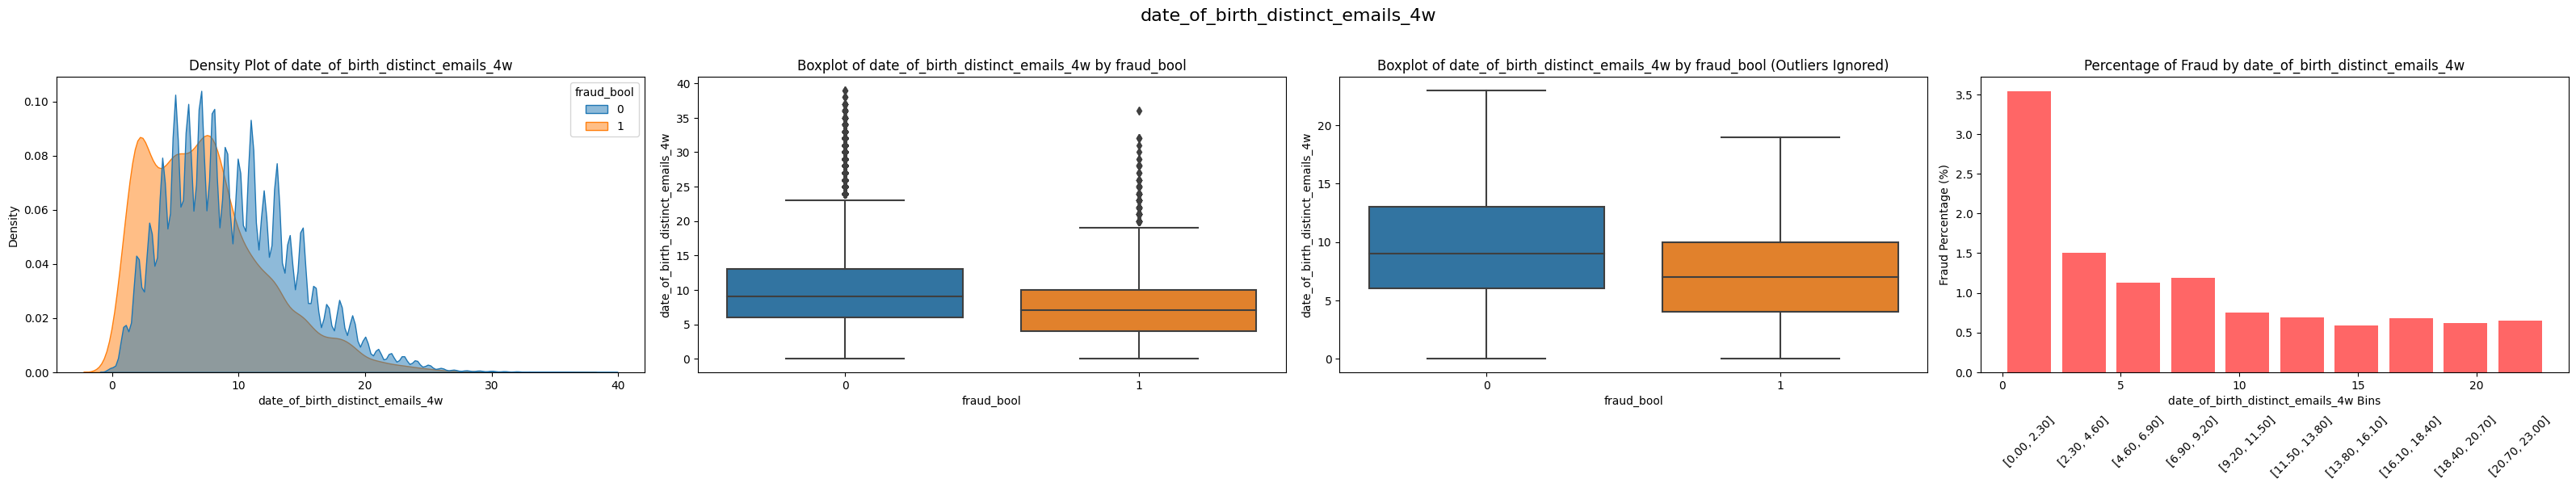

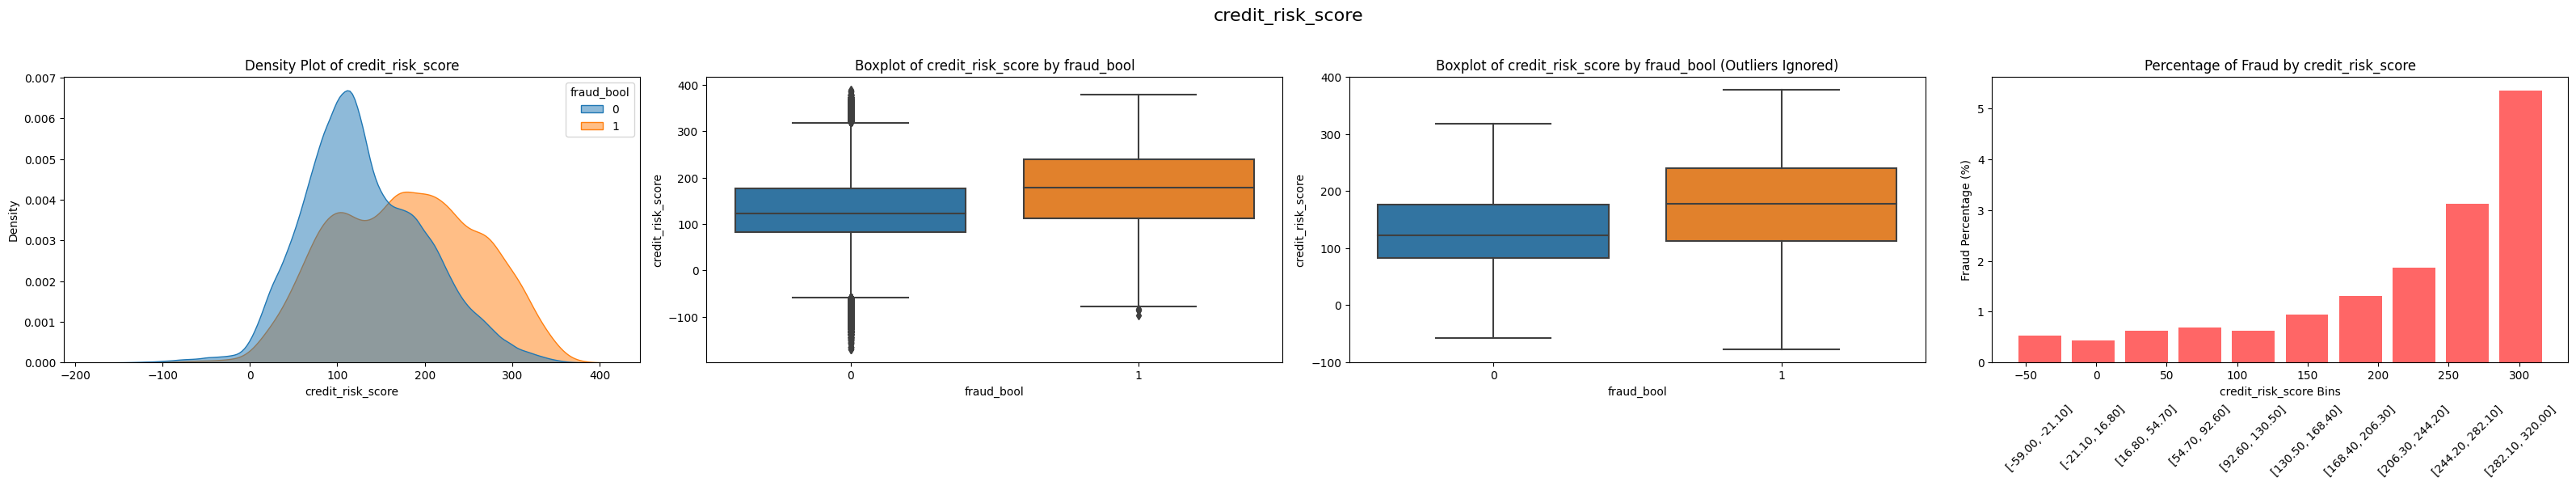

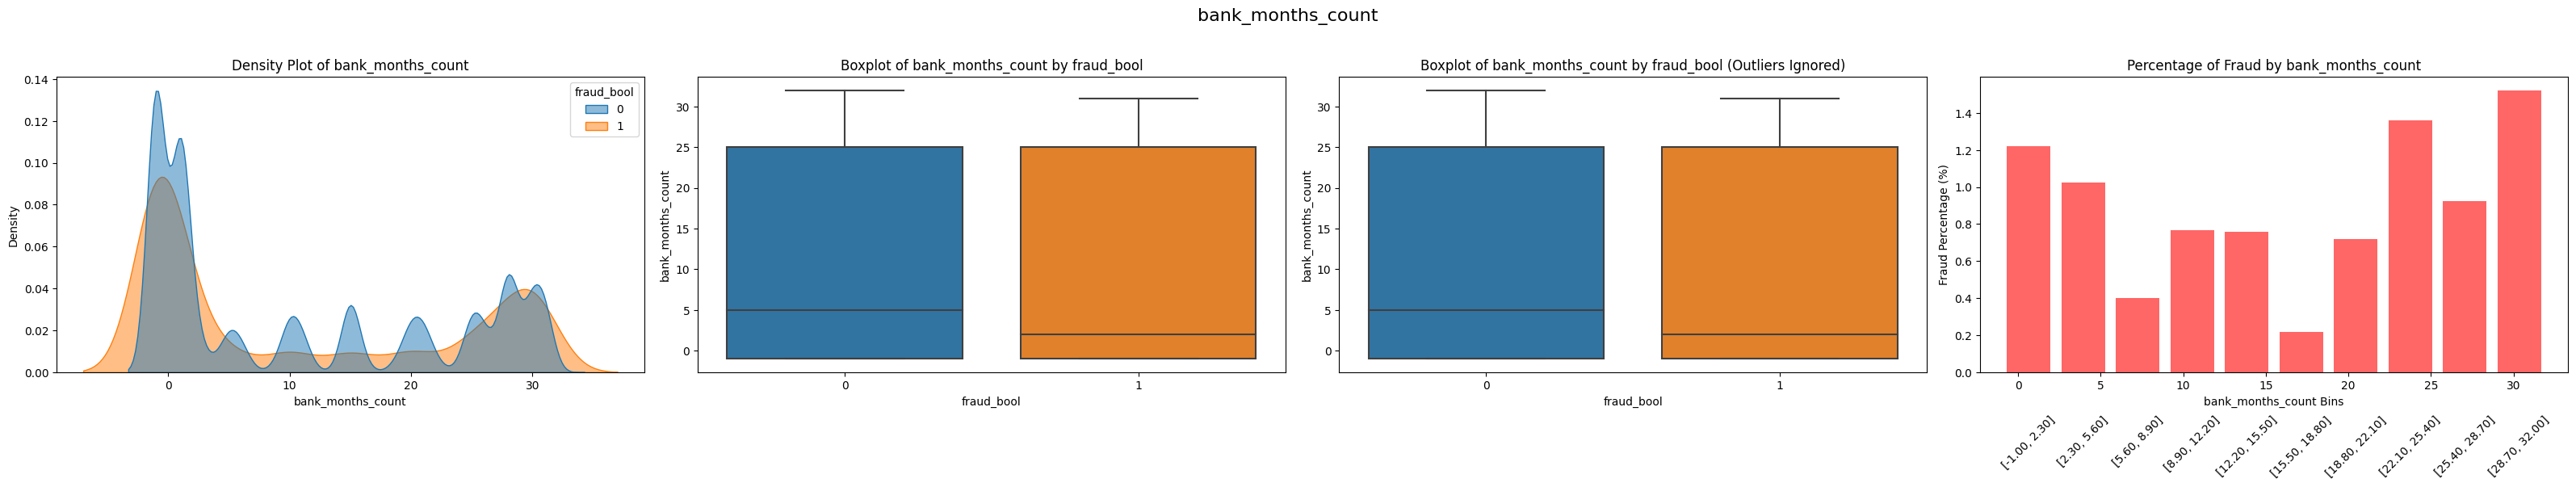

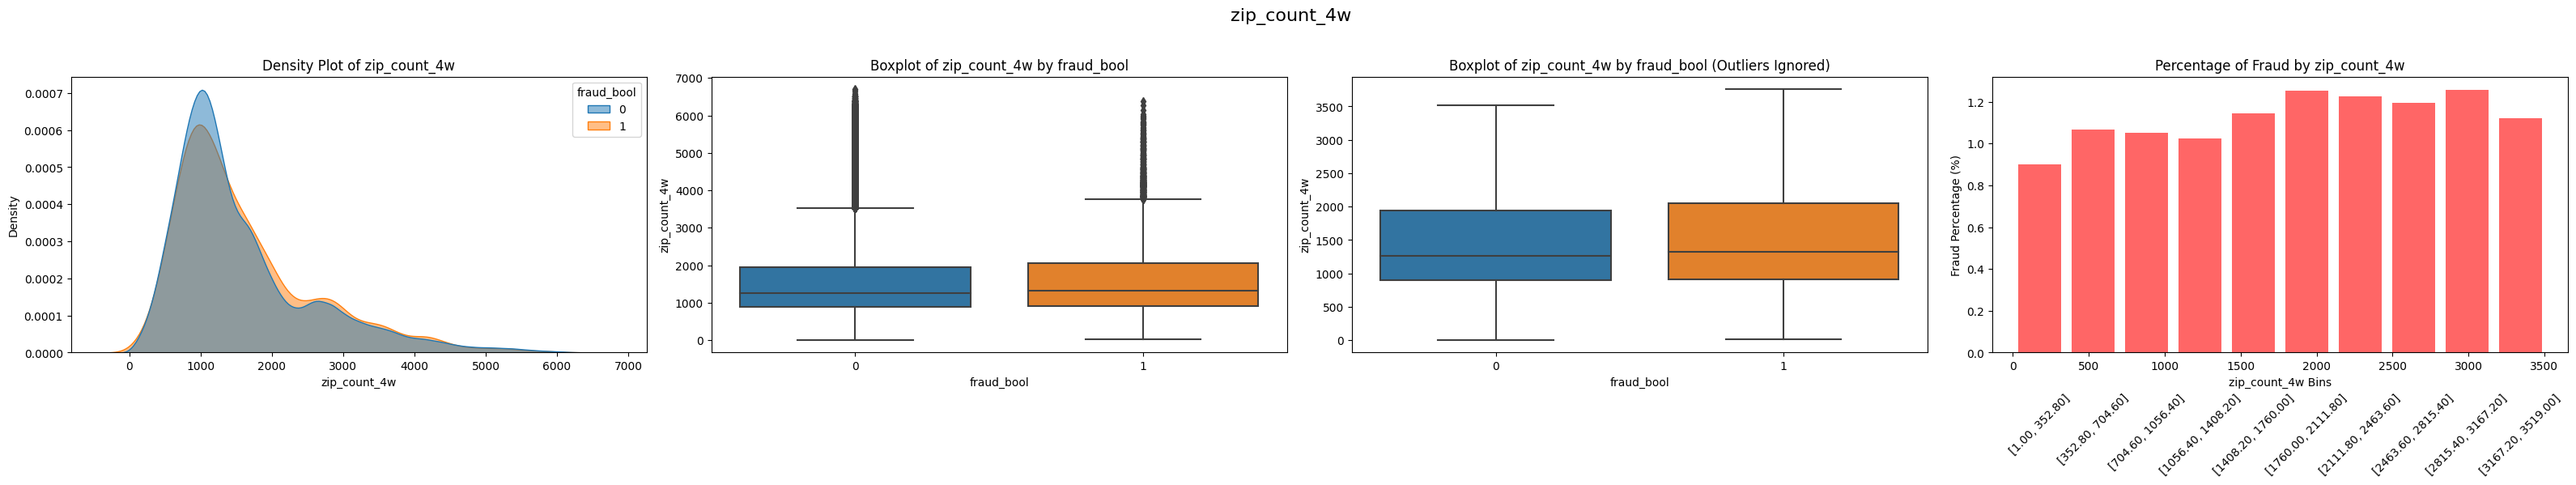

In [6]:
fv.numerical(data_types['numerical_continuous_bounded']+data_types['numerical_continuous_unbounded']+data_types['numerical_discrete'])

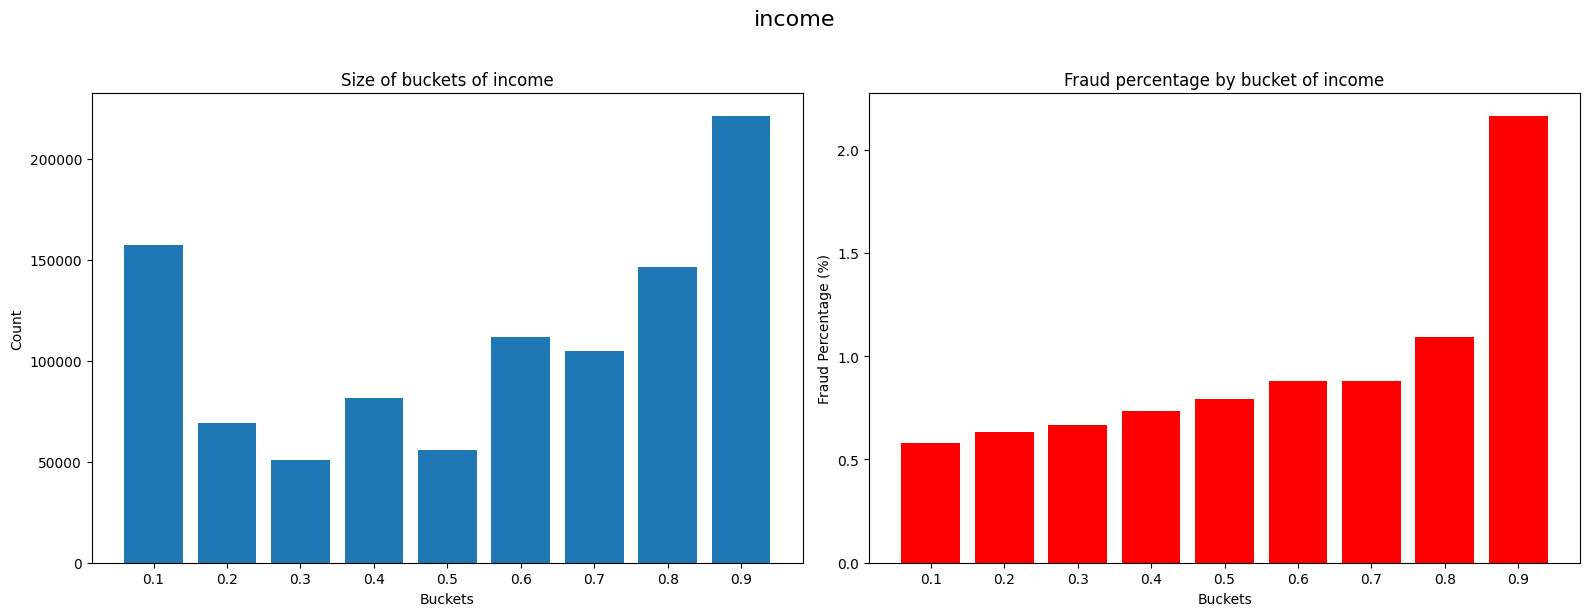

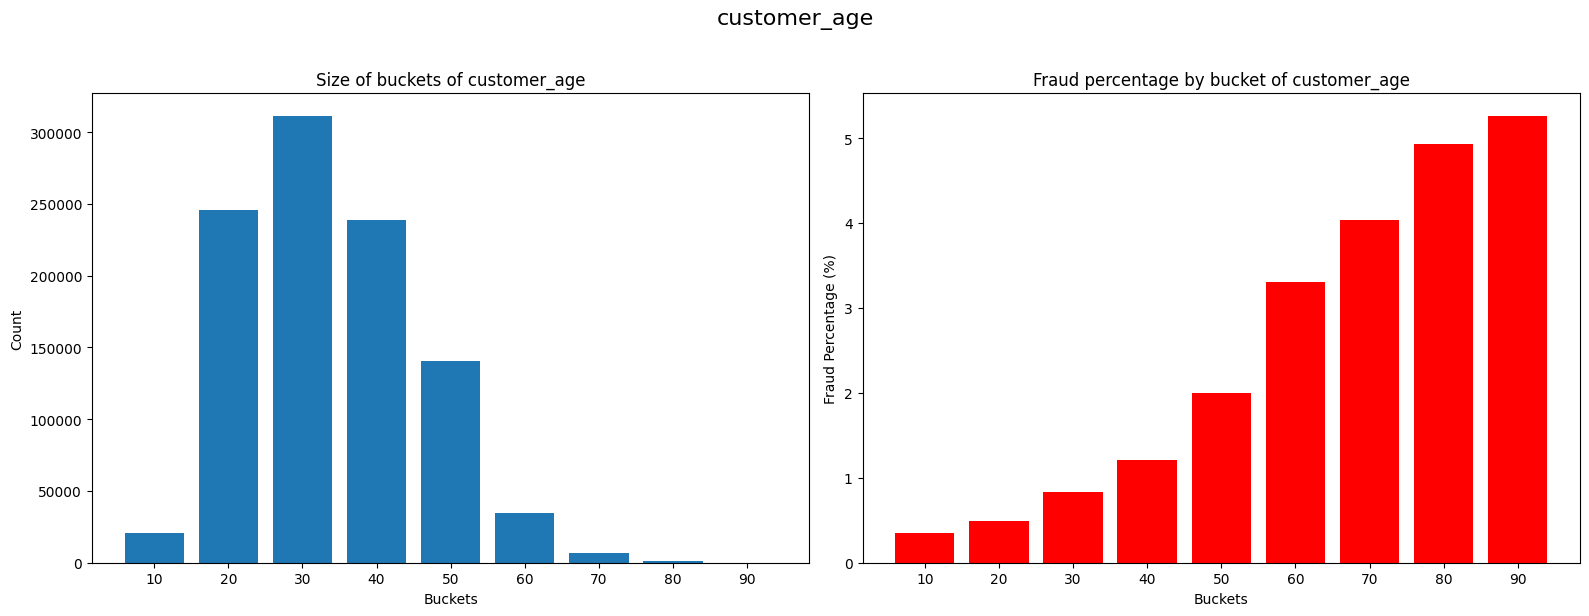

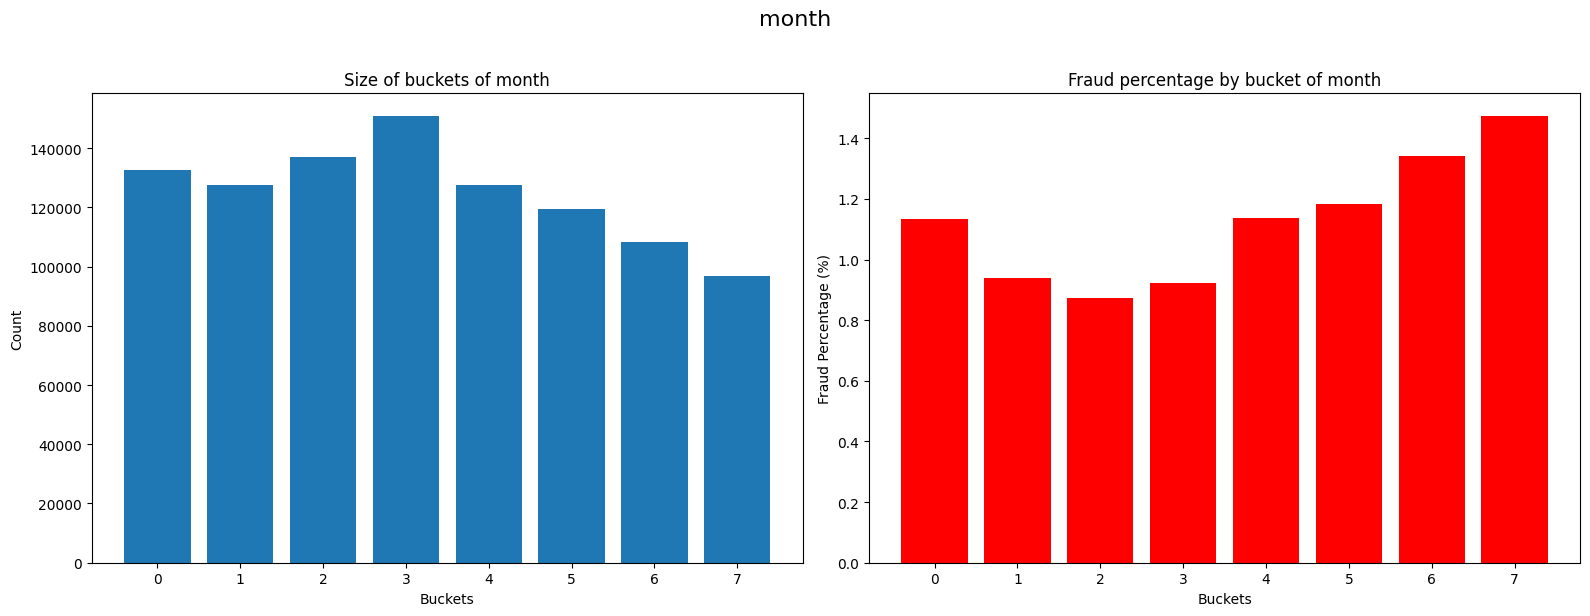

In [7]:
fv.ordinal(data_types['ordinal']+data_types['temporal'])

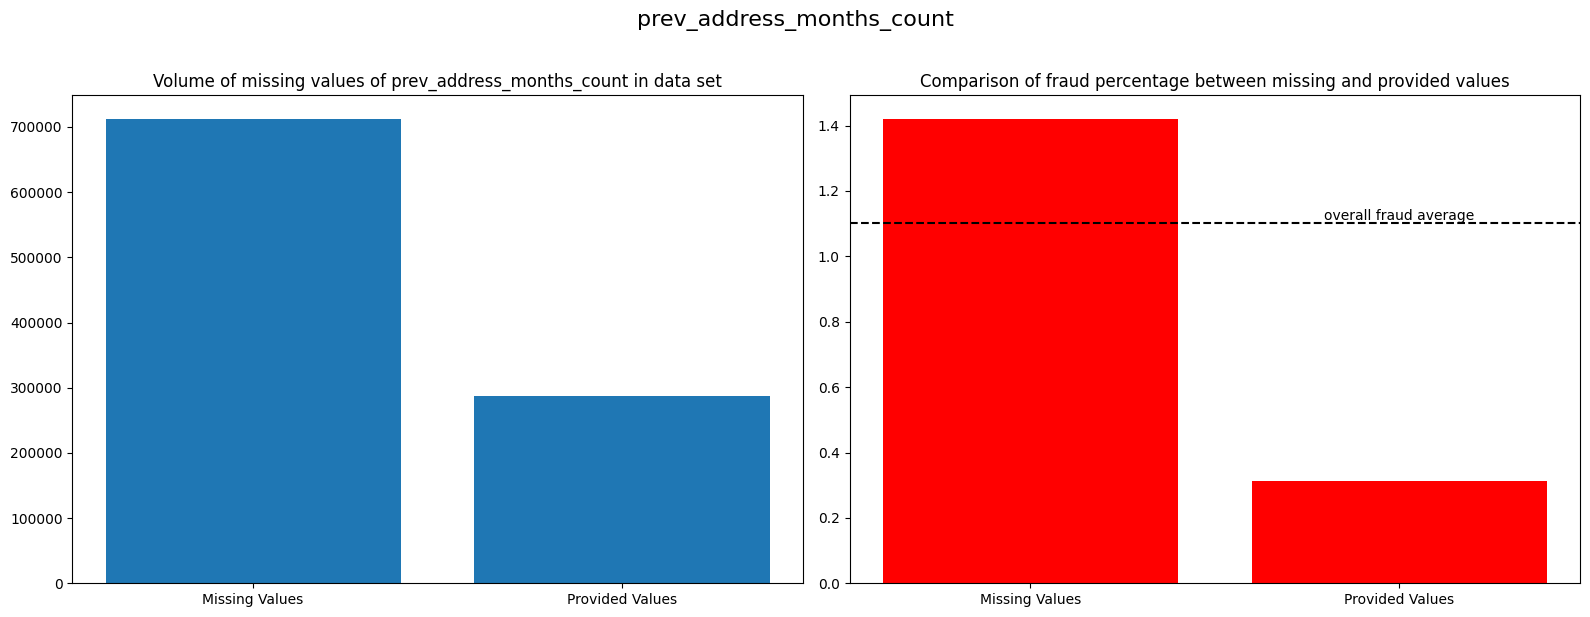

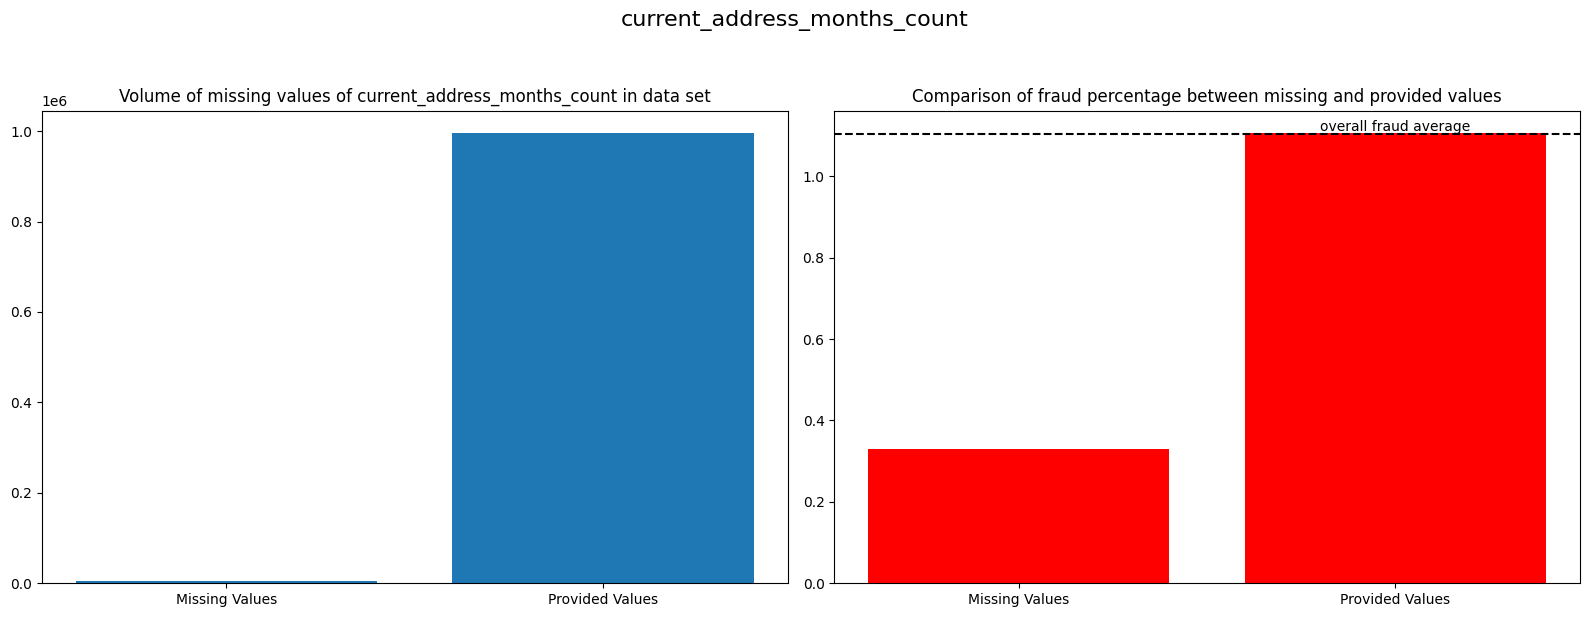

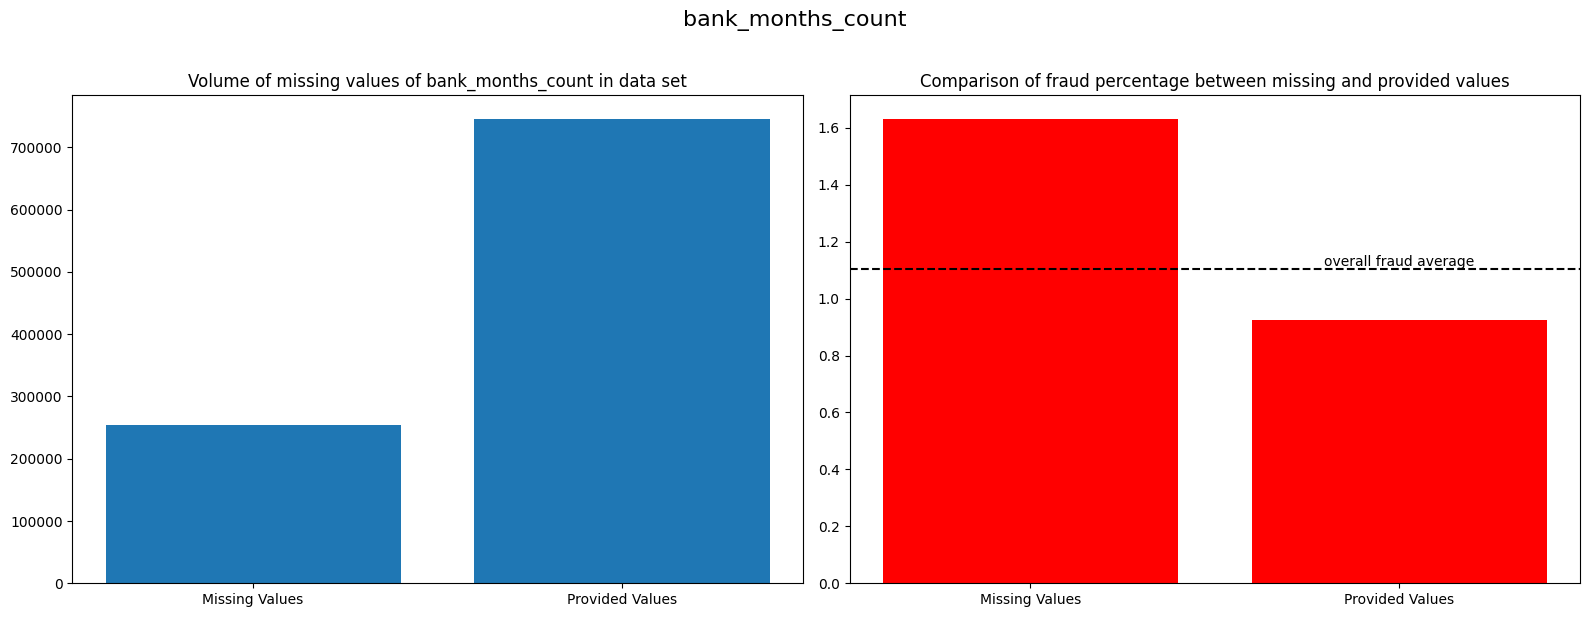

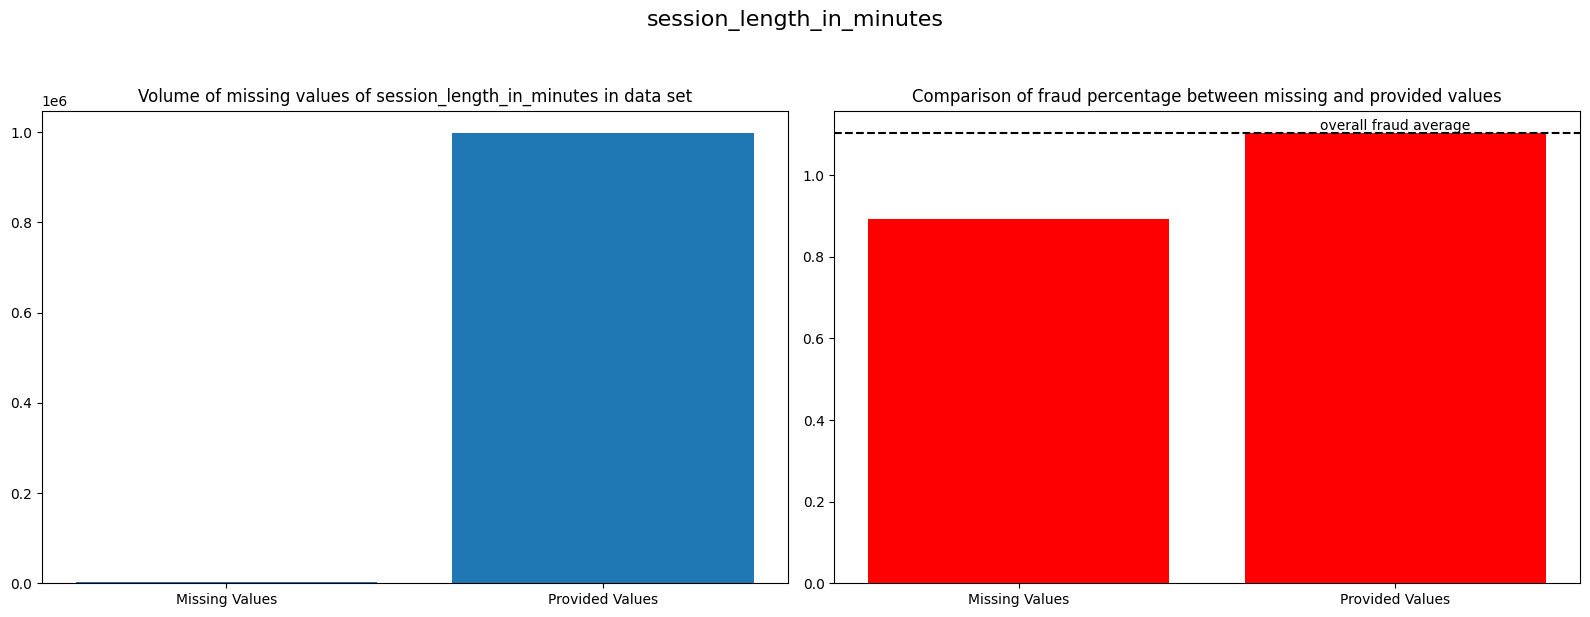

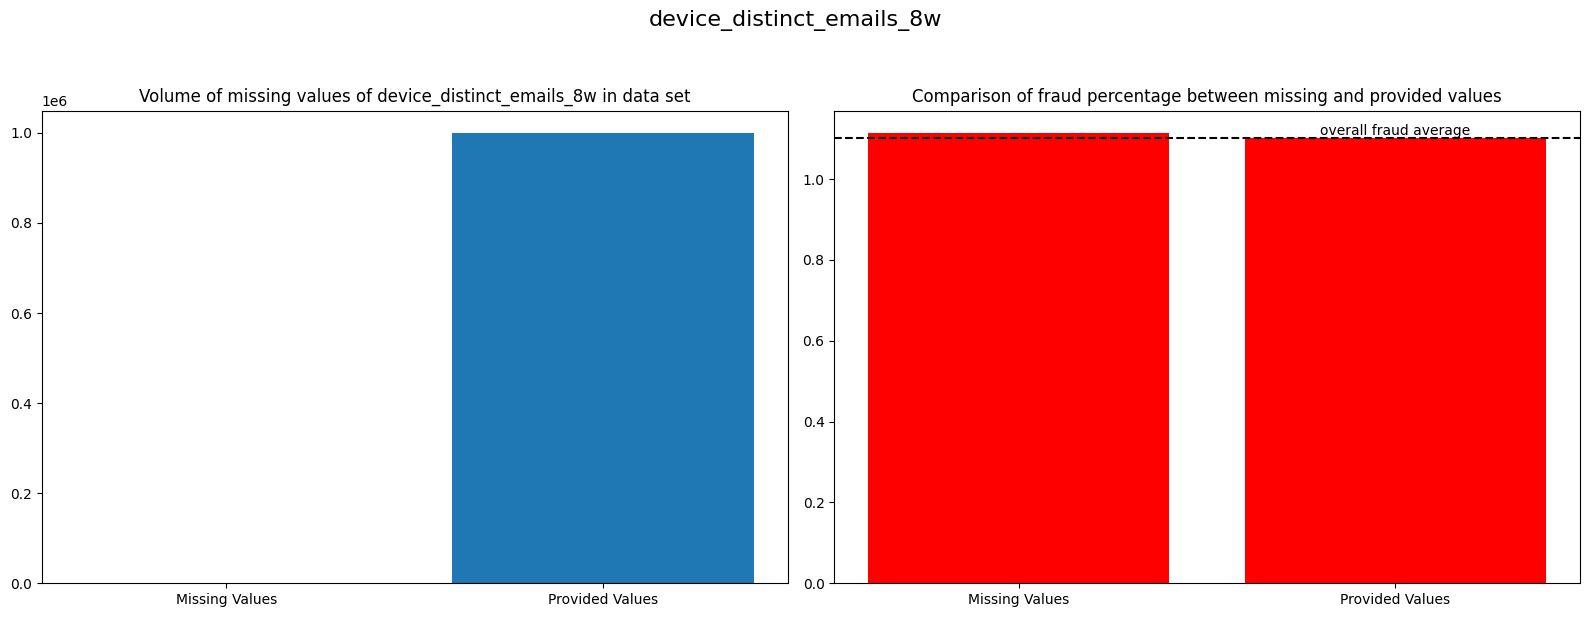

In [8]:
fv.missing_values(variables=missing_values, missing_value_type=-1)

## <u>Odds ratios</u>

In [9]:
odds = OddsRatios(df_base, target='fraud_bool', missing_values=missing_values)

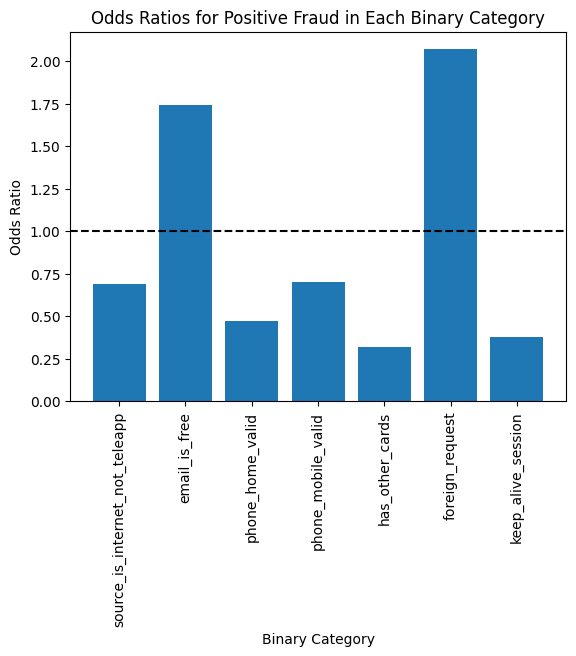

Odds Ratio
has_other_cards                   0.318417
keep_alive_session                0.376444
phone_home_valid                  0.469967
source_is_internet_not_teleapp    0.688442
phone_mobile_valid                0.702744
email_is_free                     1.740679
foreign_request                   2.069746

In [10]:
odds.binary_features(data_types['nominal_binary'])

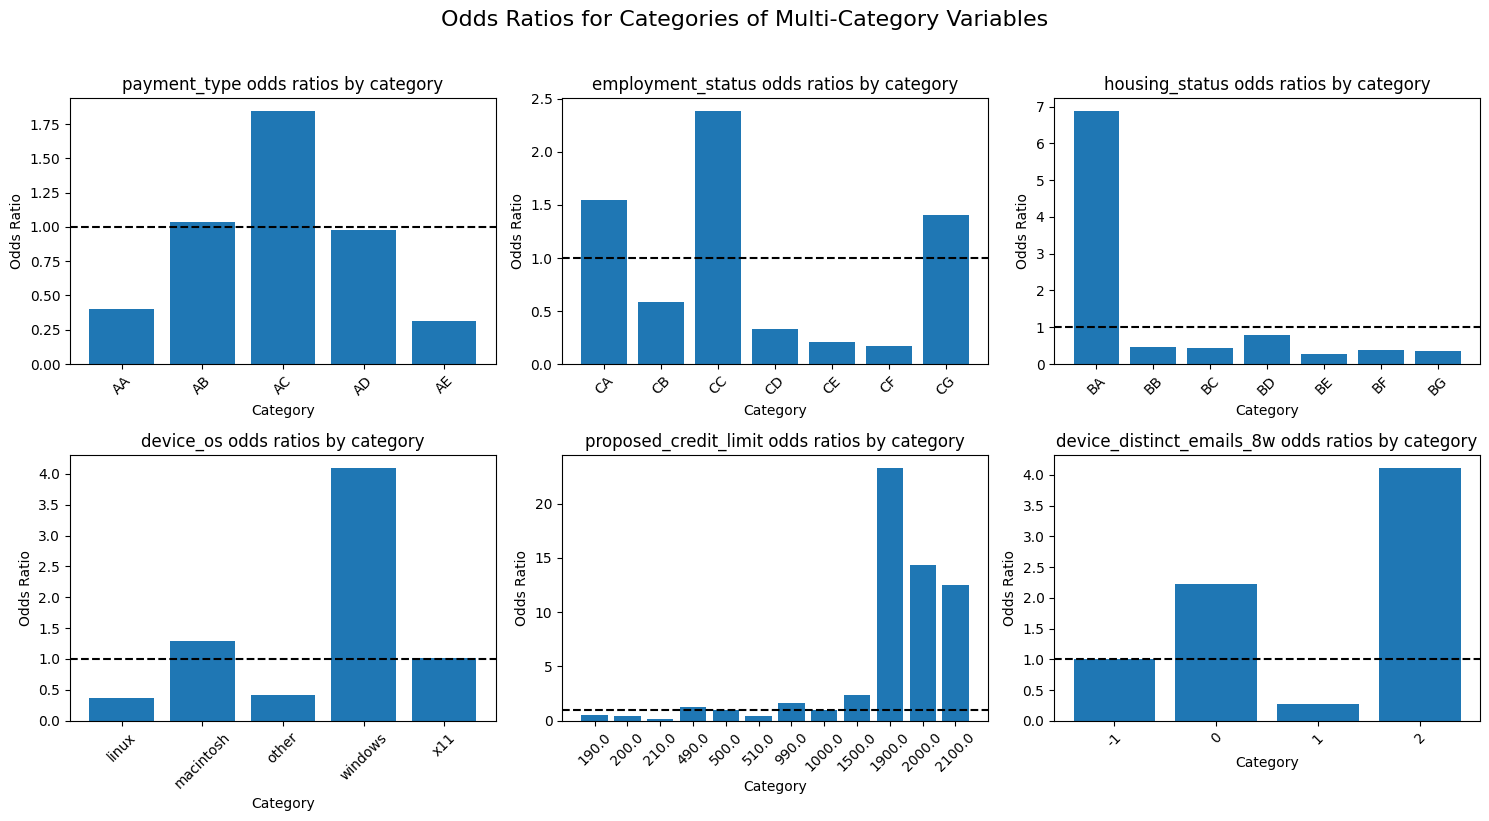

Category  Odds Ratio
Variable                                        
device_distinct_emails_8w          1    0.265266
device_distinct_emails_8w         -1    1.010371
device_distinct_emails_8w          0    2.228911
device_distinct_emails_8w          2    4.116982
device_os                      linux    0.366027
device_os                      other    0.414704
device_os                        x11    1.016389
device_os                  macintosh    1.290321
device_os                    windows    4.098390
employment_status                 CF    0.167007
employment_status                 CE    0.206102
employment_status                 CD    0.333332
employment_status                 CB    0.586513
employment_status                 CG    1.407636
employment_status                 CA    1.549991
employment_status                 CC    2.386559
housing_status                    BE    0.271163
housing_status                    BG    0.357193
housing_status                    BF    0.377276
housing_status                    BC    0.438163
housing_status                    BB    0.466137
housing_status                    BD    0.776820
housing_status                    BA    6.878803
payment_type                      AE    0.311292
payment_type                      AA    0.402194
payment_type                      AD    0.978474
payment_type                      AB    1.032689
payment_type                      AC    1.845299
proposed_credit_limit          210.0    0.147893
proposed_credit_limit          510.0    0.412056
proposed_credit_limit          200.0    0.417136
proposed_credit_limit          190.0    0.553478
proposed_credit_limit          500.0    0.969119
proposed_credit_limit         1000.0    1.001126
proposed_credit_limit          490.0    1.254403
proposed_credit_limit          990.0    1.646218
proposed_credit_limit         1500.0    2.408798
proposed_credit_limit         2100.0   12.459369
proposed_credit_limit         2000.0   14.321557
proposed_credit_limit         1900.0   23.302432

In [11]:
odds.multi_category_features(data_types['nominal_multi_category'])

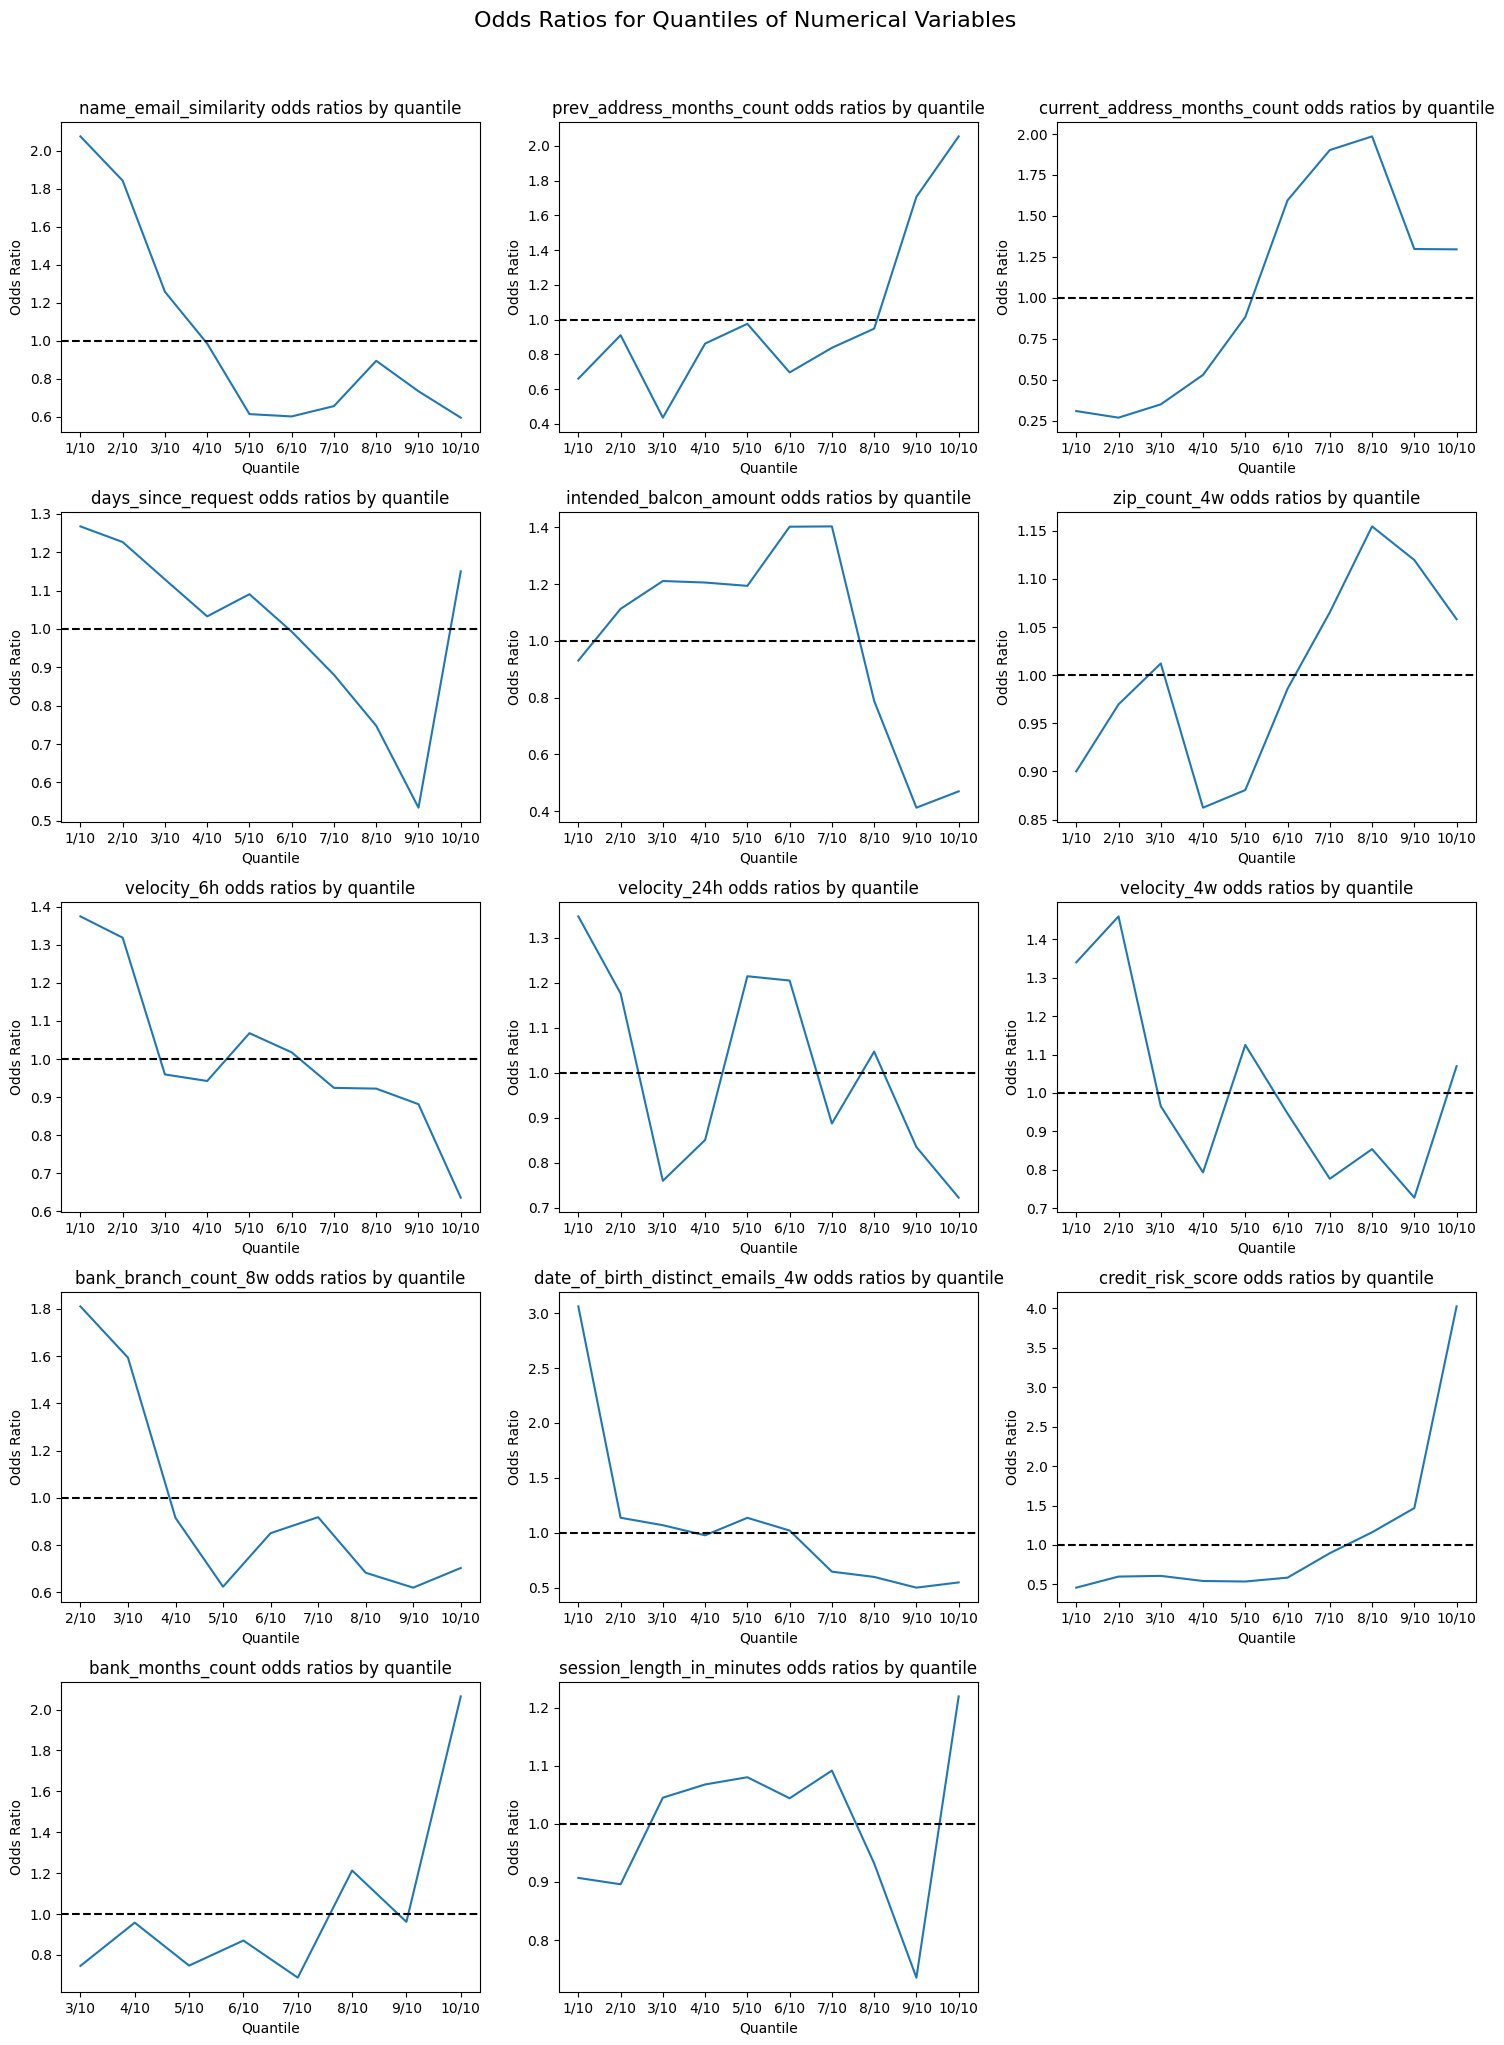

Odds Ratio: name_email_similarity  \
Quantile                                      
1/10                               2.076870   
2/10                               1.843790   
3/10                               1.258789   
4/10                               0.985862   
5/10                               0.614654   
6/10                               0.602521   
7/10                               0.656914   
8/10                               0.895365   
9/10                               0.734985   
10/10                              0.596009   

          Odds Ratio: prev_address_months_count  \
Quantile                                          
1/10                                   0.659584   
2/10                                   0.909963   
3/10                                   0.435000   
4/10                                   0.861667   
5/10                                   0.975363   
6/10                                   0.695424   
7/10                                   0.837131   
8/10                                   0.947552   
9/10                                   1.706445   
10/10                                  2.054606   

          Odds Ratio: current_address_months_count  \
Quantile                                             
1/10                                      0.307934   
2/10                                      0.267626   
3/10                                      0.348838   
4/10                                      0.528918   
5/10                                      0.882163   
6/10                                      1.595050   
7/10                                      1.902022   
8/10                                      1.985497   
9/10                                      1.297652   
10/10                                     1.295635   

          Odds Ratio: days_since_request  Odds Ratio: intended_balcon_amount  \
Quantile                                                                       
1/10                            1.267410                            0.930345   
2/10                            1.226598                            1.112497   
3/10                            1.129227                            1.210584   
4/10                            1.032816                            1.205259   
5/10                            1.090630                            1.193563   
6/10                            0.992976                            1.401952   
7/10                            0.880456                            1.403061   
8/10                            0.747490                            0.788133   
9/10                            0.534098                            0.412015   
10/10                           1.150237                            0.469461   

          Odds Ratio: zip_count_4w  Odds Ratio: velocity_6h  \
Quantile                                                      
1/10                      0.900108                 1.374300   
2/10                      0.969685                 1.318376   
3/10                      1.012211                 0.959534   
4/10                      0.862397                 0.942401   
5/10                      0.880684                 1.067831   
6/10                      0.985928                 1.017453   
7/10                      1.065372                 0.924330   
8/10                      1.154645                 0.922326   
9/10                      1.119696                 0.881449   
10/10                     1.058216                 0.636210   

          Odds Ratio: velocity_24h  Odds Ratio: velocity_4w  \
Quantile                                                      
1/10                      1.347902                 1.340229   
2/10                      1.176602                 1.459979   
3/10                      0.760031                 0.965596   
4/10                      0.850785                 0.792996   
5/10                      1.214849                 1.125039   
6/10                    

In [12]:
odds.numerical_features(data_types['numerical'])

## <u>Stats Scores</u>

In [13]:
fs = FeatureSignificance(df_base, target='fraud_bool')
fs.info()

temporal                        [Spearman Correlation, Chi-Square Test (Goodness of Fit)]
ordinal                           [Spearman Correlation, Logistic Regression Coefficient]
numerical_discrete                                   [Point-Biserial Correlation, T-Test]
numerical_continuous                             [Spearman Correlation, T-Test, K-S Test]
nominal_multi_category        [Chi-Square Test of Independence (Contingency), Cramér’s V]
nominal_binary            [Chi-Square Test of Independence (Contingency), Point-Biserial]
dtype: object


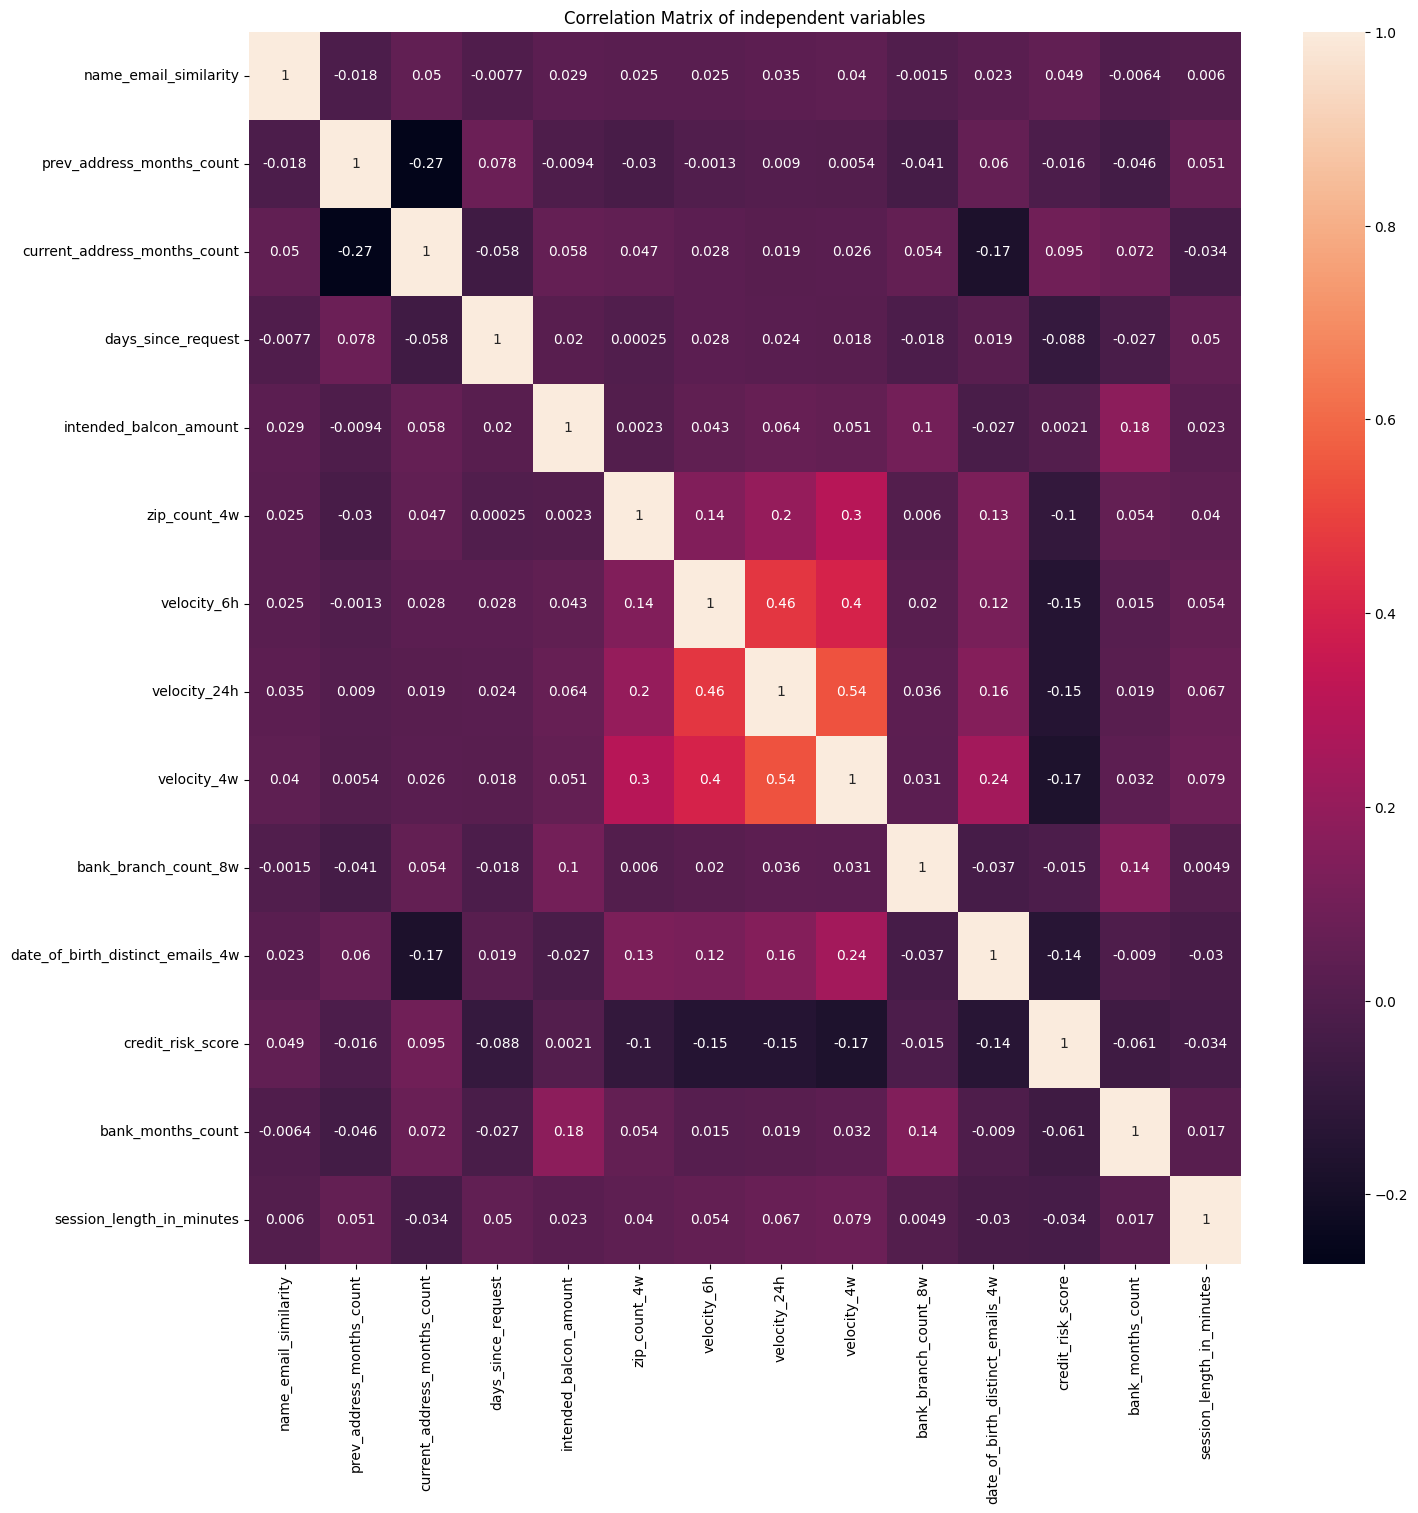

In [14]:
fs.correlations(data_types['numerical'])

In [15]:
fs.numerical_discrete(data_types['numerical_discrete'])

Point-Biserial Correlation        p-value  \
Feature                                                                       
credit_risk_score                                   0.070588   0.000000e+00   
current_address_months_count                        0.033480  7.586132e-245   
bank_months_count                                   0.020929   4.312880e-73   
prev_address_months_count                           0.020083   5.238191e-27   
zip_count_4w                                        0.005212   1.868284e-07   
bank_branch_count_8w                               -0.011577   5.397590e-31   
date_of_birth_distinct_emails_4w                   -0.043224   0.000000e+00   

                                     t_stat  t_stat p_value  
Feature                                                      
credit_risk_score                -60.091371    0.000000e+00  
current_address_months_count     -34.620596   1.082672e-249  
bank_months_count                -17.692433    1.458684e-68  
prev_address_months_count         -8.357725    2.417317e-16  
zip_count_4w                      -5.210355    1.918071e-07  
bank_branch_count_8w              12.764196    4.674261e-37  
date_of_birth_distinct_emails_4w  44.852802    0.000000e+00

In [16]:
fs.numerical_continuous(data_types['numerical_continuous_bounded'] + data_types['numerical_continuous_unbounded'])

Spearman Correlation  Spearman p-value  \
Feature                                                             
session_length_in_minutes              0.002058      3.981677e-02   
velocity_24h                          -0.010509      7.791899e-26   
velocity_4w                           -0.013524      1.118804e-41   
days_since_request                    -0.014209      7.956264e-46   
velocity_6h                           -0.016497      3.816254e-61   
intended_balcon_amount                -0.017954      4.326131e-72   
name_email_similarity                 -0.037283     1.936639e-304   

                           T-Statistic  T-Test p-value  K-S Statistic  \
Feature                                                                 
session_length_in_minutes    -7.450250    1.000315e-13       0.027061   
velocity_24h                 11.511446    1.709035e-30       0.047764   
velocity_4w                  10.882405    1.915534e-27       0.071602   
days_since_request           -0.535197    5.925240e-01       0.069237   
velocity_6h                  17.508297    9.682576e-68       0.063211   
intended_balcon_amount       29.776915   1.070649e-187       0.143678   
name_email_similarity        35.923329   1.167023e-267       0.185558   

                             K-S p-value  
Feature                                   
session_length_in_minutes   2.318452e-07  
velocity_24h                4.602355e-22  
velocity_4w                 4.519496e-49  
days_since_request          6.583571e-46  
velocity_6h                 2.493909e-38  
intended_balcon_amount     6.122341e-197  
name_email_similarity       0.000000e+00

In [17]:
fs.nominal_multi_category(data_types['nominal_multi_category'])

Chi Square Statistic  p-value (Chi-Square)  \
Feature                                                                 
housing_status                     13202.787719                   0.0   
proposed_credit_limit              11738.244603                   0.0   
device_os                           6478.945928                   0.0   
device_distinct_emails_8w           2234.990477                   0.0   
employment_status                   1572.499001                   0.0   
payment_type                        1528.342010                   0.0   

                           cramers v  
Feature                               
housing_status              0.114903  
proposed_credit_limit       0.108343  
device_os                   0.080492  
device_distinct_emails_8w   0.047276  
employment_status           0.039655  
payment_type                0.039094

In [18]:
fs.nominal_binary(data_types['nominal_binary'])

Chi Square Statistic  p-value (Chi-Square)  \
Feature                                                                      
email_is_free                             769.952405         1.841219e-169   
foreign_request                           284.060841          9.787932e-64   
source_is_internet_not_teleapp             14.937804          1.111140e-04   
phone_mobile_valid                        173.301368          1.406547e-39   
phone_home_valid                         1233.281326         3.567963e-270   
has_other_cards                          1235.161652         1.392459e-270   
keep_alive_session                       2528.754445          0.000000e+00   

                                Point-Biserial Correlation  \
Feature                                                      
email_is_free                                     0.027758   
foreign_request                                   0.016885   
source_is_internet_not_teleapp                   -0.003922   
phone_mobile_valid                               -0.013180   
phone_home_valid                                 -0.035128   
has_other_cards                                  -0.035156   
keep_alive_session                               -0.050296   

                                p-value (Point-Biserial)  
Feature                                                   
email_is_free                              1.216719e-169  
foreign_request                             5.722730e-64  
source_is_internet_not_teleapp              8.774983e-05  
phone_mobile_valid                          1.140352e-39  
phone_home_valid                           1.734899e-270  
has_other_cards                            6.347503e-271  
keep_alive_session                          0.000000e+00

In [19]:
fs.ordinal(data_types['ordinal'])

Spearman Correlation  Spearman p-value  Log Regression coef
Feature                                                                  
income                    0.049583               0.0             1.696868
customer_age              0.058146               0.0             0.044845

In [20]:
fs.temporal(data_types['temporal'])

Spearman Correlation  p-value (Spearman)  Chi-Square Statistic  \
Feature                                                                   
month                0.012949        2.362542e-38            330.160493   

         p-value (Chi-Square)  
Feature                        
month            2.166747e-67

## <u>Key takeaways</u>

Thoughts:

- foreign request much more likely to be fraud
- has other cards much less likely to be fraud
- keep session alive is big indicator, makes fraud much less likely
- differences in employment_status result in very different fraud percentage CC very high, CF very low
- BA housing_status is massive indicator of fraud
- device_os possibly big indicator comparing windows to linux/other
- device_distint_emails_8w being greater than 1 causes big increase in fraud percent
- high proposed credit limit sample is very small but fraud goes up a lot, is there significant relationship with fraud
- email_is_free shows quite a big difference and quite balanced population in dataset
                
- current address months count missing is big fraud indicator, or when it's high
- previous address months count is big factor, when missing fraud is much higher
                
- date_of_birth_distinct_emails_4w is big fraud indicator when LOW
- credit_risk_score big indicator for fraud when HIGH
                
- high income and high customer age seem to correlate with higher rates of fraud ?
                
- email_similarity is big indicator too?
                
- veolocity_6h relationship with fraud is quite linear


## clear non linear divisions in data:

- FOREIGN REQUEST == 1

- KEEP_ALIVE_SESSION == 1

- HOUSING_STATUS is BA

- EMPLOYMENT_STATUS shows big fluctuations (CC very high / CF very low)

- PREVIOUS_ADDRESS_MONTHS_COUNT - Missing value 

## clear directional trends in data:

- EMAIL_SIMILARITY negative correlation with fraud

- CREDIT_RISK_SCORE  positive correlation with fraud

- DATE_OF_BIRTH_DISTINCT_EMAILS_4W negative correlation with fraud
                